# Final Project: Atliq Financial Analysis

# Contents <a id='back'></a>
* [Introduction](#intro)
* [Exploring and Cleaning Data](#explore)
     * [General information of the datasets](#general)
     * [Optimizing the data for analysis](#optimize)
     * [Data Visualization](#data)
* [Financial Analysis](#financial)
     * [What is the average monthly purchase size?](#size)
     * [What is the average revenue of the products and their categories?](#avgrev)
     * [What’s the average time gap between purchases for repeat customers?](#gap)
     * [How have revenue/profits changed over time?](#revprof)
     * [What is the total profit made by each customer?](#ltv)
     * [Which Market Is More Profitable?](#market)
     * [What is the average gross revenue per product, before and after discounts?](#disc)
     * [How did the margin contribution evolve?](#margin)
* [Statistical Test](#static)
     * [Splitting the datasets into 2 groups](#split)
     * [Cumulative revenue by group](#com)
     * [Cumulative average order size by group](#comavg)
     * [Plot a scatter chart of order prices](#scatter)
     * [The statistical significance of the difference in average order size between the groups](#avggroups)
* [Overall conclusion](#overall)

## Introduction

AtliQ hardware is a company that delivers computer hardware and peripheral Manufacturers to its clients, which has several branches throughout India. They sell different types of hardware to big players such as Amazon, Best Buy, and Walmart. In this project, the client is interested in `financial analysis` like Revenue/Profits/Margin Change and etc. The client provided 6 datasets. Let's take a look at them.
    
* `dim_customer` - contains customer-related data: The dataset contains customer code, the company name of the customer, the platform through which the sale was done, 	the channel of sale, the country of the customer’s office, 	abbreviation of the Region, and Region of the customer’s office.
* `dim_product` - contains product-related data: The dataset contains unique identifier of the product, group of the product, 	type of product ( sub-division), category of the product, full product name, variant of the product.
* `fact_pre_discount` - contains pre-invoice deductions information for each product: The dataset contains unique identifier of the customer, year when the discount was valid, discount % per invoice for specific customer.
* `fact_manufacturing_cost` - contains the cost incurred in the production of each product: The dataset contains unique identifier of product, year of production, cost of production of unit of product.
* `fact_gross_price` - contains gross price information for each product:The dataset contains unique identifier of product, year of transaction, final price for the product.
* `fact_sales_monthly` - contains monthly sales data for each product: The dataset contains date of transaction, unique identifier of product, unique identifier of customer, year of transaction.
The database contains data for a 5-year period. The data will be cleaned and manipulated using SQL queries. The analysis and tests will be done using `Python`.

The project is based on the following steps:
1. Exploring and Cleaning Data;
   * General information.
   * Missing and Duplicated Value.
   * Data Visualization
2. Revenue/Profits/Margin Change;
   * What is the average monthly purchase size?
   * What is the average revenue of the products?
   * What’s the average time gap between purchases for repeat customers?
   * How have revenue/profits changed over time?
   * What is the total profit made by each customer?
   * What is the average gross revenue per product, before and after discounts?
   * How did the margin contribution evolve?
evolv
3. Statistical Test;
   * Split thedataset into 2 groups.
   * Calculate Cumulatives.
   * Make conclusions.


## Exploring and Cleaning Data <a id='explore'></a>

### General information of the datasets <a id='general'></a>

In [7]:
### connect to the database
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as stats
import sqlite3
import pandas as pd
con = sqlite3.connect('atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


* `dim_customer` table

In [9]:
### execute simple query in Python with your connection
dim_customer=pd.read_sql("SELECT * FROM dim_customer", con)
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [10]:
# Change `customer_code` column data type
dim_customer['customer_code'] = dim_customer['customer_code'].astype(object)

The `dim_customer` table contains 7 columns and 209 rows. The data type of column `customer_code` changed to `object` since the column contains data related to customer identification.

* `dim_product` table

In [13]:
dim_product = pd.read_sql("SELECT * FROM dim_product", con)
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


The `dim_product` table contains 6 columns and 397 rows. The data types of the columns don't need to be modified.

* `fact_pre_discount` table

In [16]:
fact_pre_discount = pd.read_sql("SELECT * FROM fact_pre_discount", con)
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [17]:
fact_pre_discount['customer_code'] = fact_pre_discount['customer_code'].astype(object)

The `fact_pre_discount` table contains 3 columns and 1045 rows. The data type of column `customer_code` changed to `object` since the column contains data related to customer identification.

* `fact_manufacturing_cost` table

In [20]:
fact_manufacturing_cost = pd.read_sql("SELECT * FROM fact_manufacturing_cost", con)
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


The `fact_manufacturing_cost` table contains 3 columns and 1182 rows. The data types of the columns don't need to be modified.

* `fact_gross_price` table

In [23]:
fact_gross_price = pd.read_sql("SELECT * FROM fact_gross_price", con)
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


The `fact_gross_price` table contains 3 columns and 1182 rows. The data types of the columns don't need to be modified.

* `fact_sales_monthly` table

In [26]:
fact_sales_monthly = pd.read_sql("SELECT * FROM fact_sales_monthly", con)
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


In [27]:
fact_sales_monthly['date'] = pd.to_datetime(fact_sales_monthly['date'])
fact_sales_monthly['customer_code'] = fact_sales_monthly['customer_code'].astype(object)

The `fact_sales_monthly` table contains 5 columns and 67251 rows. The number of columns' rows differ, which means there are missing values in the table. The data type of the `date` column and the `customer_code` column was modified to `datetime` and `object`, respectively.

Overall, the tables are ready to use after missing and duplicated values have been checked. The data types match the data usage area, and the column names are 

[Back to Contents](#back)

### Optimizing the data for analysis <a id='optimize'></a>

The missing and duplicated values will be checked using a function. The `analyze_data` function contains `isna()` method for missing values and `duplicated()` method for duplicated values. Once the missing and duplicated values check, the function will print random rows from the table using `sample()`.

In [33]:
def analyze_data(df):

    # Missing values
    print(df.isna().sum())
    print()

    # Duplicates
    print(df.duplicated().sum())
    print()

    # Random rows
    display(df.sample(10))

* Check for missing or duplicated values in the `dim_customer` table.

In [35]:
#('',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]
analyze_data(dim_customer)

customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

0



,customer_code,customer,platform,channel,market,sub_zone,region
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
128,90015145,Synthetic,Brick & Mortar,Retailer,Norway,NE,EU
50,90002004,Vijay Sales,Brick & Mortar,Retailer,India,India,APAC
11,70008169,Atliq Exclusive,Brick & Mortar,Direct,Australia,ANZ,APAC
10,70007199,Atliq e Store,E-Commerce,Direct,South Korea,ROA,APAC
158,90018112,Euronics,Brick & Mortar,Retailer,Spain,SE,EU
22,70013126,Atliq e Store,E-Commerce,Direct,Italy,SE,EU
191,90022080,Staples,Brick & Mortar,Retailer,USA,NA,NA
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
161,90019200,Sorefoz,Brick & Mortar,Retailer,Sweden,NE,EU


The `dim_customer` table doesn't contain any missing or duplicated values.

* Check for missing or duplicated values in the `dim_product` table.

In [38]:
analyze_data(dim_product)

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

0



,product_code,division,segment,category,product,variant
283,A5219110403,PC,Notebook,Business Laptop,AQ BZ Gen Z,Standard Red
87,A2118150104,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Plus 2
374,A6620160502,N & S,Storage,External Solid State Drives,AQ Clx3,Plus
254,A4821110802,PC,Notebook,Personal Laptop,AQ F16,Standard Blue
317,A5621110405,PC,Notebook,Gaming Laptop,AQ Smash 1,Plus Cool Blue
140,A3018150203,P & A,Accessories,Keyboard,AQ Master wireless x1,Plus 1
276,A5119110304,PC,Notebook,Business Laptop,AQ BZ Gen Y,Plus Grey
38,A0821150501,P & A,Peripherals,Graphic Card,AQ Marquee P3,Standard
182,A3718150103,P & A,Accessories,Batteries,AQ LION x1,Plus 2
146,A3119150303,P & A,Accessories,Keyboard,AQ Gamers,Plus 1


The `fact_pre_discount` table doesn't contain any missing or duplicated values.

* Check for missing or duplicated values in the `fact_pre_discount` table.

In [41]:
analyze_data(fact_pre_discount)

customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

0



,customer_code,fiscal_year,pre_invoice_discount_pct
242,90002002,2020,0.1860
982,90023023,2020,0.2292
210,80006155,2018,0.2797
169,70021096,2022,0.1954
27,70004070,2020,0.2054
124,70014143,2022,0.2350
932,90022075,2020,0.2293
53,70007199,2021,0.2105
532,90012037,2020,0.3023
137,70016177,2020,0.1003


The `fact_pre_discount` table doesn't contain any missing or duplicated values.

* Check for missing or duplicated values in the `fact_manufacturing_cost` table.

In [44]:
analyze_data(fact_manufacturing_cost)

product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64

0



,product_code,cost_year,manufacturing_cost
488,A3220150402,2020,5.6322
398,A2821150803,2022,7.0161
31,A0320150301,2022,7.7241
956,A5419110206,2022,196.3985
10,A0118150103,2020,6.3264
109,A0620150306,2020,10.4828
832,A5018110205,2021,140.1533
473,A3120150304,2021,4.8276
40,A0418150102,2019,4.6576
386,A2721150702,2022,5.4421


The `fact_manufacturing_cost` table doesn't contain any missing or duplicated values.

* Check for missing or duplicated values in the `fact_gross_price` table.

In [47]:
analyze_data(fact_gross_price)

product_code    0
fiscal_year     0
gross_price     0
dtype: int64

0



,product_code,fiscal_year,gross_price
526,A3421150604,2022,29.2567
947,A5419110204,2022,642.8538
743,A4520110504,2021,341.7343
930,A5419110201,2020,556.8804
778,A4721110705,2022,391.0368
987,A5520110307,2020,576.5295
1100,A6120110207,2022,839.0145
1115,A6319160201,2020,16.4988
152,A1018150103,2021,123.9315
243,A1819150303,2021,32.1924


The `fact_gross_price` table doesn't contain any missing or duplicated values.

* Check for missing or duplicated values in the `fact_sales_monthly` table.

In [50]:
analyze_data(fact_sales_monthly)

date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64

0



,date,product_code,customer_code,sold_quantity,fiscal_year
18032,2021-09-01,A0118150103,70011193,202,2022
3444,2020-04-01,A0118150101,90009132,6,2020
13765,2019-04-01,A0118150103,90002008,65,2019
13578,2019-02-01,A0118150103,90016174,1,2019
28882,2020-11-01,A0219150201,90003179,44,2021
45644,2020-10-01,A0321150302,90011192,64,2021
18836,2017-11-01,A0118150104,90008164,9,2018
3891,2020-07-01,A0118150101,90012033,13,2020
31935,2019-04-01,A0219150202,90014136,2,2019
287,2017-12-01,A0118150101,90022071,65,2018


The `fact_gross_price` table contains only 3 missing values. Let's take a look at them.

In [52]:
display(fact_sales_monthly[fact_sales_monthly.isnull().any(axis=1)])

,date,product_code,customer_code,sold_quantity,fiscal_year


Row number 67250 has no information on the buyer, sold quantity, or year. Since we don't have the necessary data, we can drop this row.

In [54]:
cursor.execute("""
    DELETE FROM fact_sales_monthly
    WHERE customer_code	IS NULL
""")
con.commit()
fact_sales_monthly=pd.read_sql("SELECT * FROM fact_sales_monthly", con)
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


In [55]:
display(fact_sales_monthly[fact_sales_monthly.isnull().any(axis=1)])

,date,product_code,customer_code,sold_quantity,fiscal_year


[Back to Contents](#back)

### Data Visualization <a id='data'></a>

* The `dim_product` table contains data on product identification, division, category, and other attributes. Before the analysis, the tables will be visualized to give an overall view of the data.

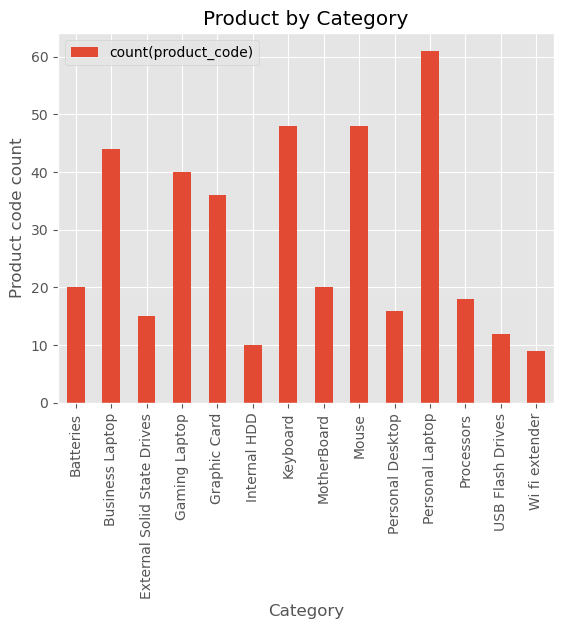

In [59]:
query_product_cat = """
SELECT 
    count(product_code),
    category
from
    dim_product
GROUP BY
    category;
"""

product_by_category=pd.read_sql(query_product_cat, con)
product_by_category.reset_index()
matplotlib.style.use('ggplot')
product_by_category.plot(kind='bar', x='category', y='count(product_code)')
plt.xlabel('Category')
plt.ylabel('Product code count')
plt.title('Product by Category')
plt.show()

Personal laptops have the most species, with 60 different types. The bar chart shows general data on the products hence, we don't know which category is the best seller.

* The `fact_manufacturing_cost` table contains data on product costs. Let's create a line chart showing the total cost over years.

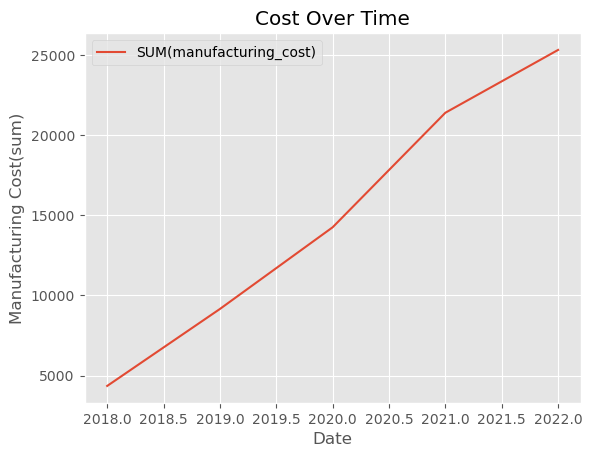

In [62]:
query_cost_time="""
select
    SUM(manufacturing_cost),
    cost_year
from
    fact_manufacturing_cost
GROUP BY
    cost_year;
"""
product_by_category=pd.read_sql(query_cost_time, con)
product_by_category.plot(kind='line', x='cost_year', y='SUM(manufacturing_cost)')
plt.xlabel('Date')
plt.ylabel('Manufacturing Cost(sum)')
plt.title('Cost Over Time')
plt.show()

The cost of the products increased over time. The reason might be the increasing demand from customers over the years.

* Let's check the most expensive products in each category. To do that, we need to join `dim_product` and `fact_gross_price` tables together.

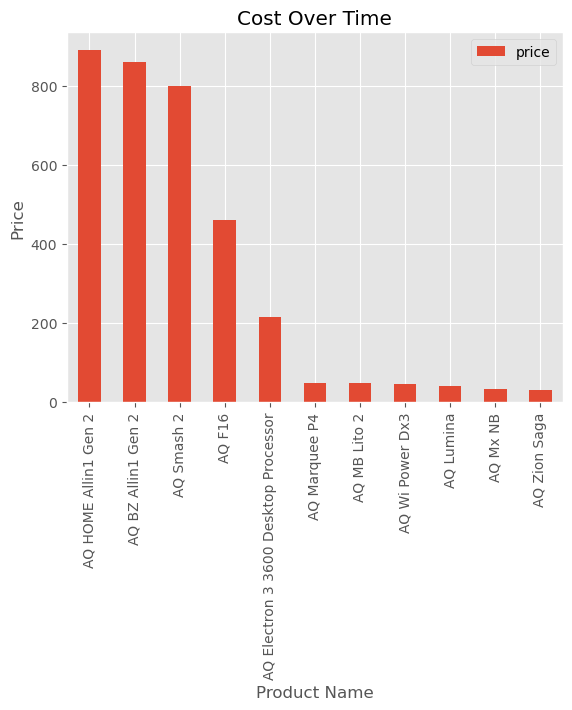

In [65]:
query_top_products = """
SELECT DISTINCT
    dim_product.product,
    dim_product.category,
    MAX(fact_gross_price.gross_price) as price
FROM
    fact_gross_price INNER JOIN dim_product ON fact_gross_price.product_code = dim_product.product_code
GROUP BY
    category
ORDER BY
    gross_price DESC;
"""
query_top_products=pd.read_sql(query_top_products, con)
query_top_products.loc[:10].plot(kind='bar', x='product', y='price')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Cost Over Time')
plt.show()

The most expensive product is `AQ HOME Alin1 Gen 2`, which is a personal desktop. The order of the top 3 categories goes by `Personal Desktop`, `Business Laptop`, and `Gaming Laptop` hold the most expensive products.

* Another useful piece of information would be the distribution of the product quantity sold out.

In [68]:
product_sold = """
SELECT
    dim_product.product as product,
    fact_sales_monthly.product_code as product_code,
    SUM(fact_sales_monthly.sold_quantity) as sold_quantity
FROM fact_sales_monthly 
LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code
LEFT JOIN dim_product ON fact_sales_monthly.product_code = dim_product.product_code
GROUP BY product;
"""
product_sold=pd.read_sql(product_sold, con)
product_sold

,product,product_code,sold_quantity
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,A0118150101,5613039
1,AQ Mforce Gen X,A0418150101,2859124
2,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,A0219150201,3974405
3,AQ Zion Saga,A0320150301,2006496


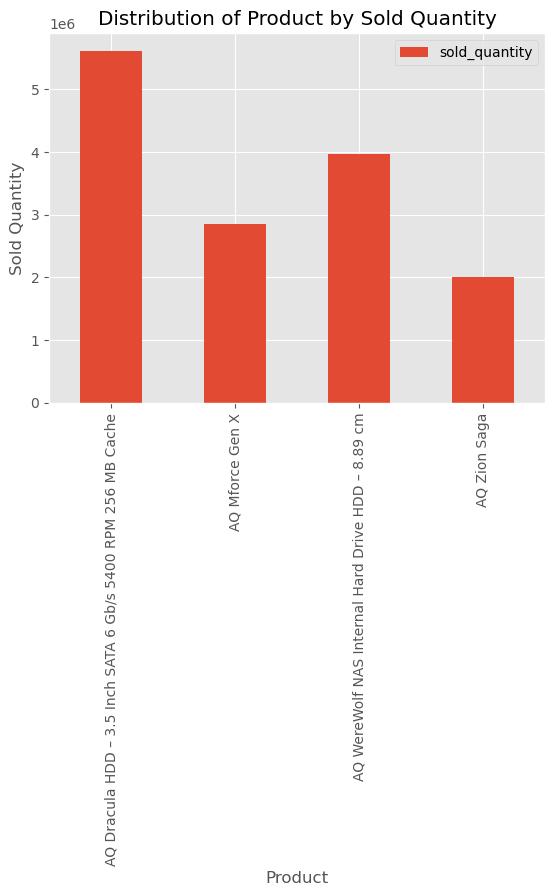

In [69]:
product_sold.plot(kind='bar', x='product', y='sold_quantity')
plt.title('Distribution of Product by Sold Quantity')
plt.xlabel('Product')
plt.ylabel('Sold Quantity')
plt.show()

* AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache is the clear leader in sold quantity. It outperforms all other products by a significant margin, suggesting it's either a bestseller due to price, utility, or customer preference.
* The AQ Werewolf NAS Internal Hard Drive HDD – 8.89 cm comes in second. This indicates a strong demand for storage-focused hardware, especially for NAS use cases.
* The AQ Mforce Gen X shows moderate performance — better than AQ Zion Saga, but well below the HDD products. May indicate either a niche demand or higher pricing, suppressing volume.
* AQ Zion Saga has the lowest sold quantity of the group.
    * Could suggest issues such as:
    * Limited market fit
    * Higher price point
    * Poor availability or marketing

[Back to Contents](#back)

## Financial Analysis <a id='financial'></a>

In [73]:
fact_pre_discount

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


### What is the average monthly purchase size? <a id='size'></a>

In [75]:
avg_purchase = """
SELECT
    fact_sales_monthly.date as date,
    strftime('%Y-%m', date) AS month,
    strftime('%Y', date) AS year,
    fact_sales_monthly.product_code as product_code,
    SUM(fact_sales_monthly.sold_quantity) as sold_quantity,
    AVG((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity) as revenue
FROM fact_sales_monthly 
    LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    LEFT JOIN fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
group by month;
"""

avg_purchase=pd.read_sql(avg_purchase, con)
avg_purchase['date'] = pd.to_datetime(avg_purchase['date'])

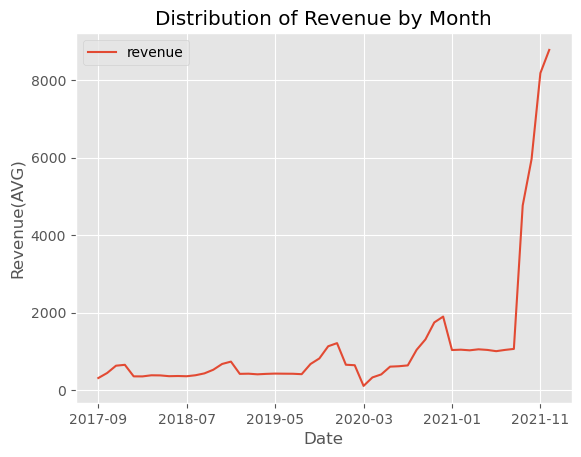

In [76]:
avg_purchase.plot(kind='line', x='month', y='revenue')
plt.title('Distribution of Revenue by Month')
plt.xlabel('Date')
plt.ylabel('Revenue(AVG)')
plt.show()

The average monthly revenue remained relatively stable and low from 2017 through mid-2020. Late 2020 to early 2021 shows moderate growth, with fluctuations but a clear upward trend. Starting mid-to-late 2021, there's a sharp and sustained spike in revenue. 
This sharp increase may be due to one or more of the following:
* New product launch
* Major marketing campaign
* Customer base expansion

* Let's take a look at the distribution of revenue by year.

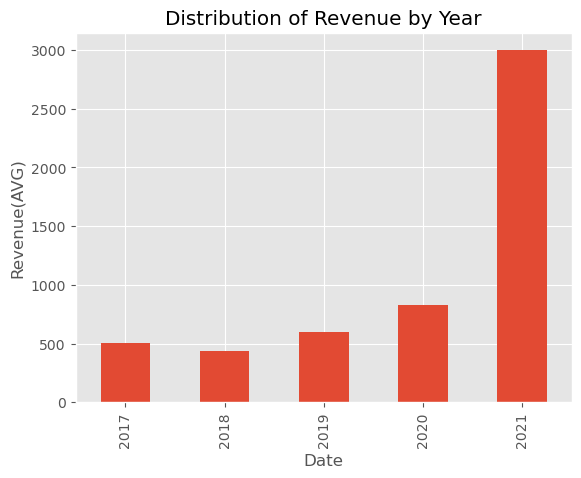

In [79]:
avg_purchase.groupby('year')['revenue'].mean().plot(kind='bar')
plt.title('Distribution of Revenue by Year')
plt.xlabel('Date')
plt.ylabel('Revenue(AVG)')
plt.show()

* Let's see if it is the sold quantity effected the revenue in the last year

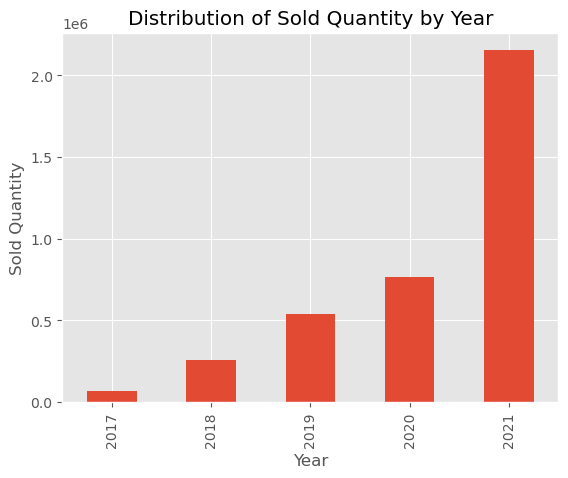

In [81]:
avg_purchase.groupby('year')['sold_quantity'].sum().plot(kind='bar')

plt.title('Distribution of Sold Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Sold Quantity')
plt.show()

From 2017 to 2018, there was a modest increase in sold quantities. 
The increase becomes more significant from 2018 to 2019 and again from 2019 to 202 

The most notable jump occurs between 2020 and 2021, where the sold quantity surges dramatically to nearly 2 million un ns:


The sales have experienced exponential growth, especially in the last year  served.

This trend suggests increasing demand or sales volume ver time.

The sharp rise in 2021 indicates a potential breakthrough or market expansion that significantly boosted sales.

### What is the average revenue of the products? <a id='avgrev'></a>

In [84]:
avg_revenue = """
SELECT
    fact_sales_monthly.date as date,
    strftime('%Y', date) AS year,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.customer_code as customer_code,
    dim_product.product as product,
    fact_sales_monthly.sold_quantity as sold_quantity,
    ((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity) as revenue
FROM fact_sales_monthly 
    LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    LEFT JOIN dim_product ON fact_sales_monthly.product_code = dim_product.product_code
    LEFT JOIN fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
WHERE
    fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year;
"""

avg_revenue = pd.read_sql(avg_revenue, con)

* Let's see how many categories and products we have on sales table.

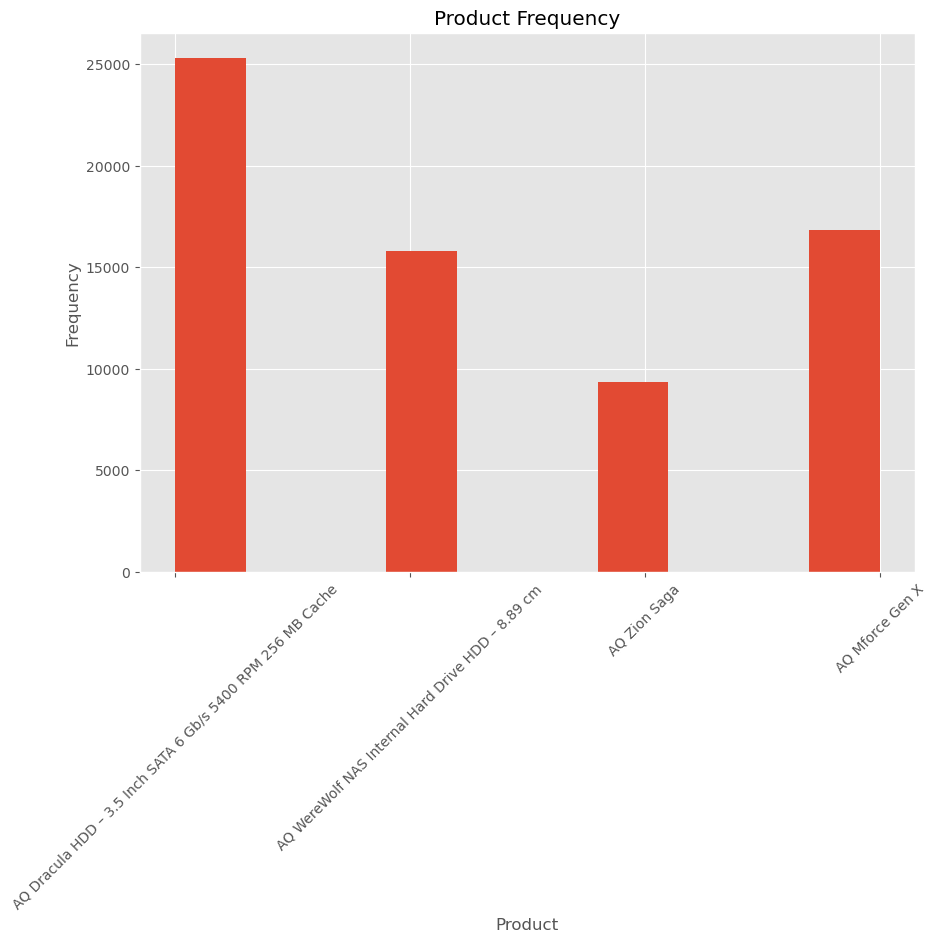

In [86]:
avg_revenue['product'].hist(figsize=(10, 7))
plt.xticks(rotation=45)
plt.title('Product Frequency')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

There are 2 categories and 4 products on the sales table. When it comes to customers who are major companies it makes sense that they are willing to by `HDD` and `Graphic card` for their equipment instead of `Laptop` or `Personal computer`.

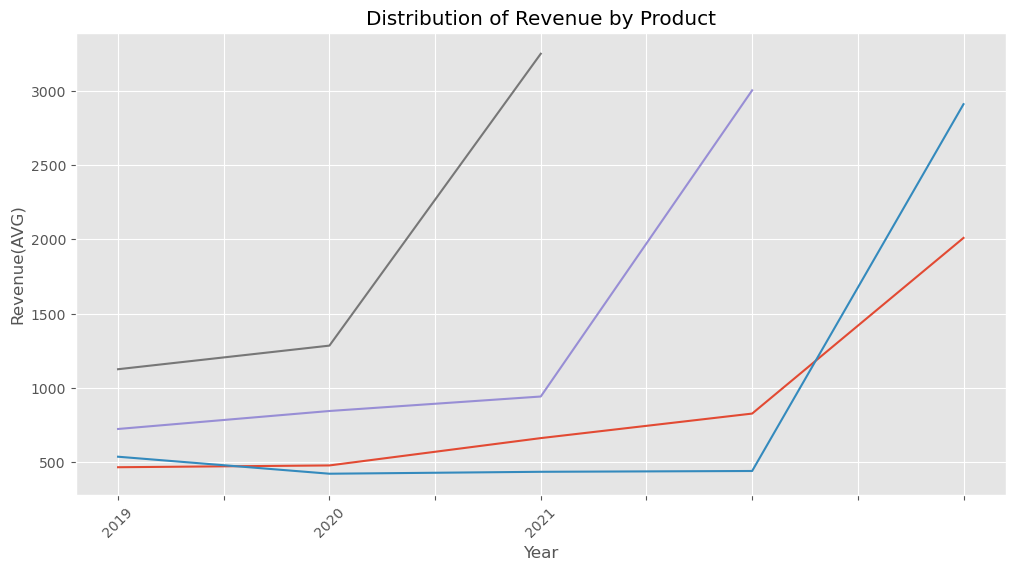

In [88]:
product_1 = avg_revenue[avg_revenue['product'] == 'AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache']
product_2 = avg_revenue[avg_revenue['product'] == 'AQ Mforce Gen X']
product_3 = avg_revenue[avg_revenue['product'] == 'AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm']
product_4 = avg_revenue[avg_revenue['product'] == 'AQ Zion Saga']

plt.figure(figsize=(12, 6))

product_1.groupby('year')['revenue'].mean().plot()
product_2.groupby('year')['revenue'].mean().plot()
product_3.groupby('year')['revenue'].mean().plot()
product_4.groupby('year')['revenue'].mean().plot()

plt.title('Distribution of Revenue by Product')
plt.xlabel('Year')
plt.ylabel('Revenue(AVG)')
plt.xticks(rotation=45)
plt.show()

Overall, revenue for these products has grown substantially in 2022 compared to previous years. 
The growth in 2022 suggests successful product strategies, market expansion, or increased customer deman 

The trend indicates positive future prospects for revenue growth across these products.

[Back to Contents](#back)

### What’s the average time gap between purchases for repeat customers? <a id='gap'></a>

In [92]:
time_gap = """
WITH ranked_sales AS (
  SELECT
    fact_sales_monthly.customer_code,
    dim_customer.customer,
    fact_sales_monthly.date,
    ROW_NUMBER() OVER (PARTITION BY fact_sales_monthly.customer_code ORDER BY fact_sales_monthly.date) AS rn
  FROM fact_sales_monthly
      JOIN dim_customer ON fact_sales_monthly.customer_code = dim_customer.customer_code
),
sales_with_lag AS (
  SELECT
    curr.customer,
    curr.customer_code,
    curr.date AS current_date,
    prev.date AS previous_date,
    JULIANDAY(curr.date) - JULIANDAY(prev.date) AS days_between
  FROM ranked_sales curr
  JOIN ranked_sales prev
    ON curr.customer_code = prev.customer_code AND curr.rn = prev.rn + 1
)
SELECT
  customer,
  customer_code,
  ROUND(AVG(days_between), 2) AS avg_days_between_purchases
FROM sales_with_lag
GROUP BY customer_code
ORDER BY avg_days_between_purchases;
"""

time_gap = pd.read_sql(time_gap, con)
time_gap

,customer,customer_code,avg_days_between_purchases
0,Atliq e Store,70015152,3.54
1,UniEuro,90015149,3.55
2,Leader,90009129,3.57
3,Amazon,90009132,3.57
4,Sound,90015144,3.57
...,...,...,...
204,Atliq e Store,70012043,4.85
205,Integration Stores,90020099,4.86
206,Notebillig,90012035,4.87
207,Currys (Dixons Carphone),90012039,4.87


<Figure size 1000x600 with 0 Axes>

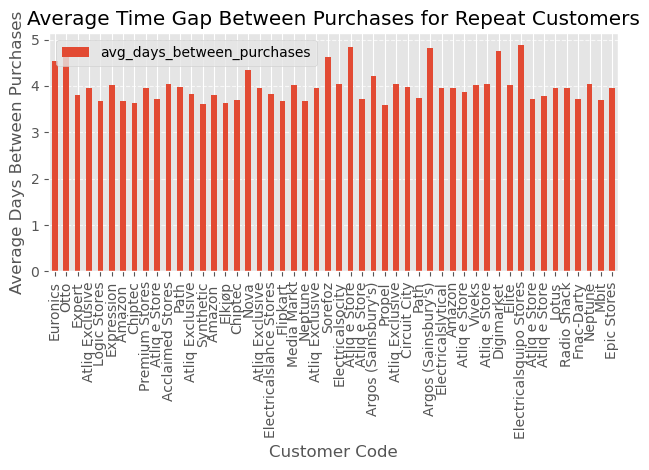

In [93]:
# Plotting
plt.figure(figsize=(10, 6))
time_gap.sample(50).plot(kind='bar', x='customer', y='avg_days_between_purchases')
plt.xlabel('Customer Code')
plt.ylabel('Average Days Between Purchases')
plt.title('Average Time Gap Between Purchases for Repeat Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The majority of customers have an average time gap between 3.5 and 4.5 days. This indicates a relatively consistent repeat purchasing behavior. Some customers (e.g., on the far left and far right of the chart) show average gaps close to 5 days. These may be less engaged or more seasonal buyers, which could benefit from re-engagement strategies.

### How have revenue/profit changed over time? <a id='revprof'></a>

In [96]:
revenue_time = """
SELECT
    fact_sales_monthly.date as date,
    fact_sales_monthly.customer_code as customer_code,
    (fact_manufacturing_cost.manufacturing_cost * fact_sales_monthly.sold_quantity)  as cost,
    ((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity) as revenue,
    (((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity) - (fact_manufacturing_cost.manufacturing_cost * fact_sales_monthly.sold_quantity)) as profit
FROM fact_sales_monthly 
    LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    LEFT JOIN fact_manufacturing_cost ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code
    LEFT JOIN fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
WHERE
    fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year and
    fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year;
"""

revenue_time = pd.read_sql(revenue_time, con)
revenue_time

,date,customer_code,cost,revenue,profit
0,2017-09-01,70002017,235.5690,784.508232,548.939232
1,2017-09-01,70002018,355.6630,1181.926268,826.263268
2,2017-09-01,70003181,78.5230,261.578119,183.055119
3,2017-09-01,70003182,27.7140,92.151541,64.437541
4,2017-09-01,70006157,23.0950,76.894636,53.799636
...,...,...,...,...,...
67245,2019-06-01,90013122,53.1290,174.666969,121.537969
67246,2019-06-01,90013124,85.0064,279.517559,194.511159
67247,2019-06-01,90014136,10.6258,34.913546,24.287746
67248,2019-06-01,90014137,5.3129,17.456160,12.143260


* First, the data must be prepared for analysis. We need to get cohort month from the `date` column and create a new `cohort` table.

In [98]:
revenue_time['date'] = pd.to_datetime(revenue_time['date'])
revenue_time['order_month'] = revenue_time['date'].dt.to_period('M')
revenue_time['cohort_month'] = revenue_time.groupby('customer_code')['date'].transform('min').dt.to_period('M')

# Calculate cohort index (months since first purchase)
revenue_time['cohort_age'] = (revenue_time['order_month'].dt.to_timestamp() - revenue_time['cohort_month'].dt.to_timestamp()) // np.timedelta64(30, 'D')
revenue_time['cohort_age'] = revenue_time['cohort_age'].astype(int)

# Group and aggregate revenue and profit
cohort_data = revenue_time.groupby(['cohort_month', 'cohort_age']).agg({
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()
cohort_data['cohort_month'].unique()
cohort_data

,cohort_month,cohort_age,revenue,profit
0,2017-09,0,203060.669509,142572.991009
1,2017-09,1,172288.460846,121089.589546
2,2017-09,2,244817.282043,172065.664943
3,2017-09,3,251174.194740,176343.843940
4,2017-09,4,208194.903409,146284.525409
...,...,...,...,...
205,2019-10,21,48740.543489,34199.428689
206,2019-10,22,49000.397164,34376.291064
207,2019-10,24,232169.303556,163164.720356
208,2019-10,25,324859.798925,228502.290825


* The table is ready. Next, the pivot table and heatmap will be created using the `sns` library.

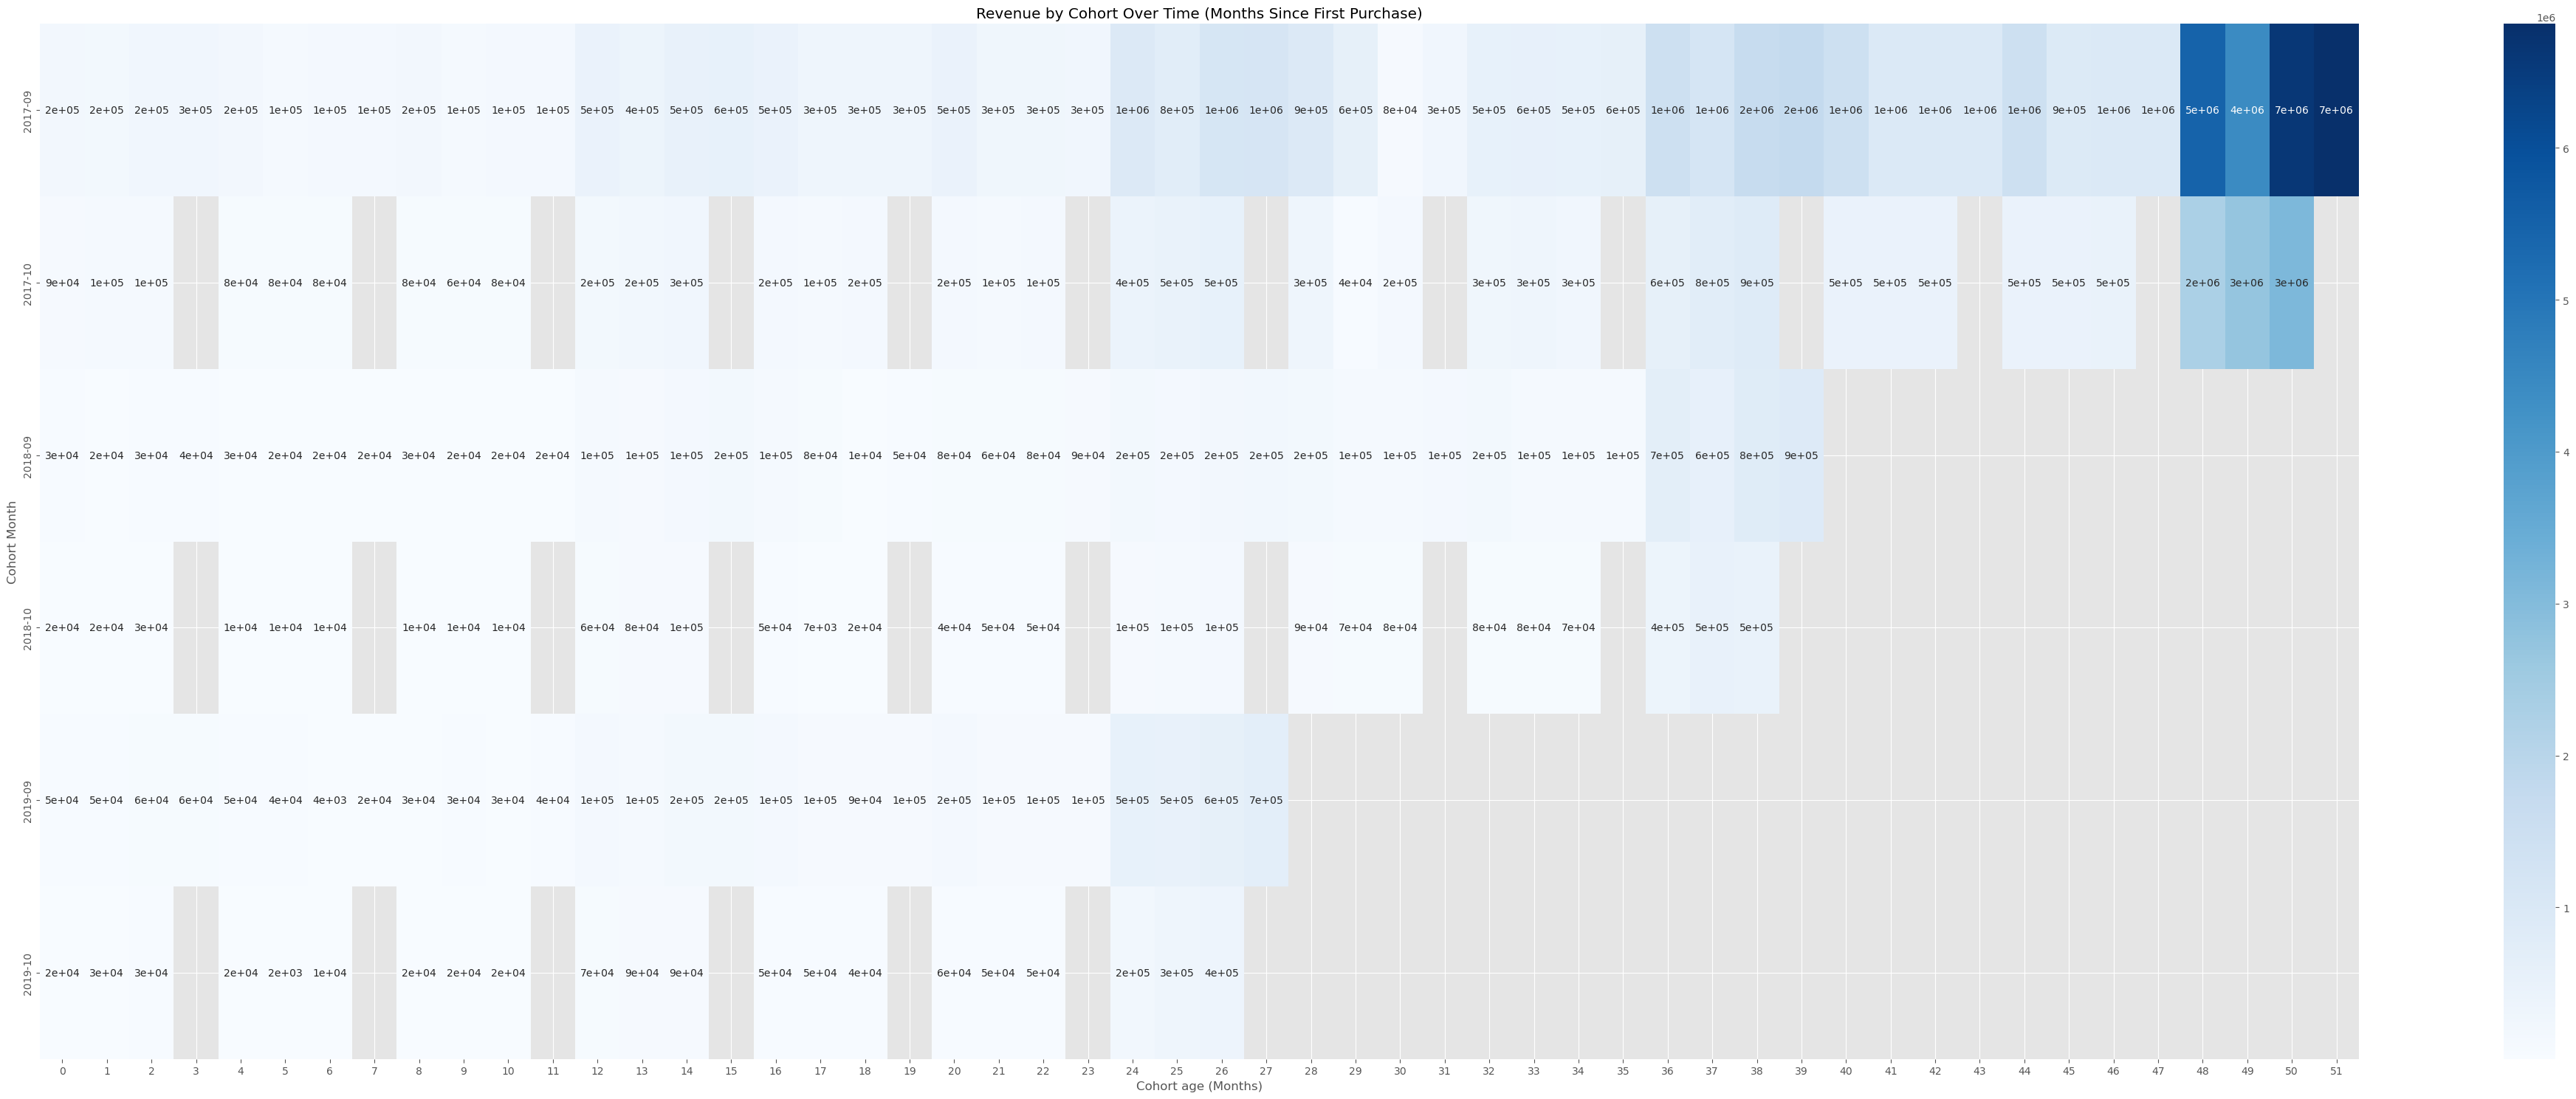

In [100]:
# Pivot tables for heatmaps
revenue_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_age', values='revenue')
profit_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_age', values='profit')

# Plot heatmaps
plt.figure(figsize=(40, 15))
sns.heatmap(revenue_pivot, annot=True, fmt=".1g", cmap="Blues")
plt.title('Revenue by Cohort Over Time (Months Since First Purchase)')
plt.xlabel('Cohort age (Months)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

The 2019-07 cohort exhibits dramatic growth over time, with revenue values increasing significantly from months 45 to 51. This cohort reaches over 7 million in revenue in later months, which is substantially higher than all other cohorts.
Cohorts from 2018–early 2019 (e.g., 2018-09, 2018-10) show lower revenue, mostly in the range of 20k–200k, even at their peaks. This may suggest:
* Fewer customers
* Lower retention rates
* Or smaller average purchase sizes
Early customers were not as profitable, possibly due to product immaturity or less aggressive marketing.

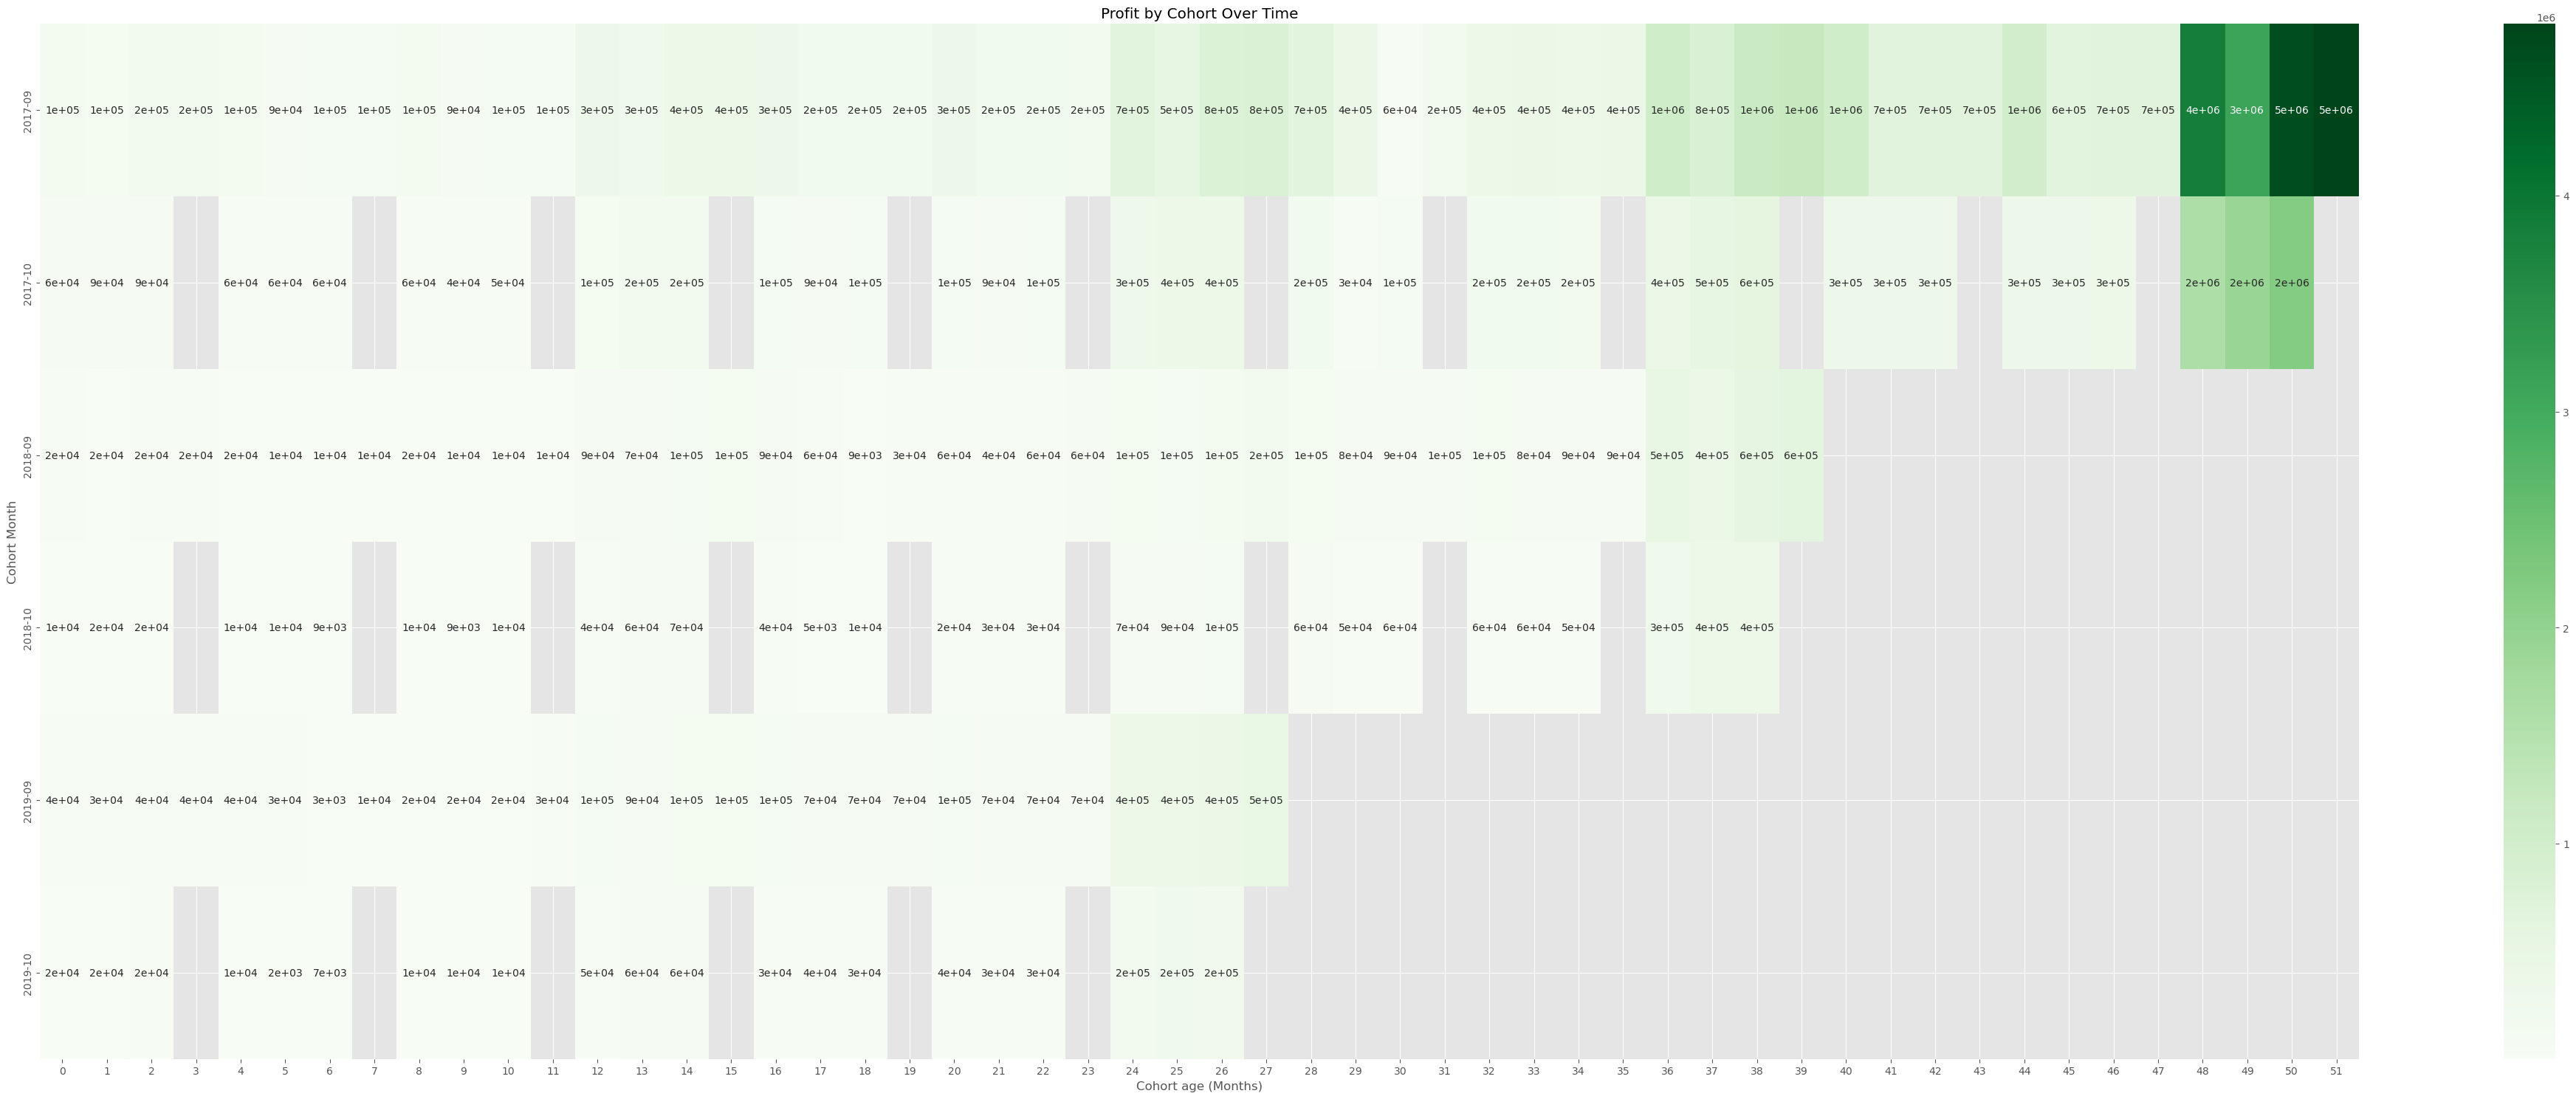

In [102]:
plt.figure(figsize=(40, 15))
sns.heatmap(profit_pivot, annot=True, fmt=".1g", cmap="Greens")
plt.title('Profit by Cohort Over Time')
plt.xlabel('Cohort age (Months)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

The profit heatmap largely follows the same pattern as the revenue heatmap, especially for the 2019-07 cohort, which reaches a peak of 5M+ in profit by months 50–51. This indicates cost structures remained stable and did not erode profitability. 
Profit builds steadily over time and accelerates after month ~40, culminating in a very strong end-period (months 48–51). Profit in these months hits 4–5 million, showing very healthy margins. This cohort likely had:
* High-value repeat buyers
* Low acquisition cost per customer
* Or cost-effective retention campaigns

[Back to Contents](#back)

### What is the total profit made by each customer? <a id='ltv'></a>

* This analysis is going to be `LTV`(Lifetime value) analysis. For this, we will use `cohort analysis`.

In [107]:
ltv = """
SELECT
    fact_sales_monthly.date as date,
    strftime('%Y-%m', first_order.first_date) as first_order_month,
    strftime('%Y-%m', date) AS month,
    count(DISTINCT fact_sales_monthly.customer_code) as cohort_size,
    (sum((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity)) as revenue,
    ((sum(fact_gross_price.gross_price) * sum(fact_sales_monthly.sold_quantity)) / count(DISTINCT fact_sales_monthly.customer_code)) as ltv,
    (CAST(strftime('%Y', fact_sales_monthly.date) AS INTEGER) - CAST(strftime('%Y', first_order.first_date) AS INTEGER)) * 12 +
    (CAST(strftime('%m', fact_sales_monthly.date) AS INTEGER) - CAST(strftime('%m', first_order.first_date) AS INTEGER)) AS cohort_age
FROM fact_sales_monthly 
    LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    LEFT JOIN fact_manufacturing_cost ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code
    LEFT JOIN fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    JOIN ( SELECT 
              customer_code,
              MIN(date) as first_date
            FROM fact_sales_monthly
            GROUP BY customer_code
) AS first_order ON fact_sales_monthly.customer_code = first_order.customer_code
WHERE
    fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year and
    fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
GROUP BY
    first_order_month,
    month
ORDER BY
    first_order_month;
"""

ltv = pd.read_sql(ltv, con)
ltv

,date,first_order_month,month,cohort_size,revenue,ltv,cohort_age
0,2017-09-01,2017-09,2017-09,84,203060.669509,1.593871e+06,0
1,2017-10-01,2017-09,2017-10,51,172288.460846,1.366008e+06,1
2,2017-11-01,2017-09,2017-11,50,244817.282043,1.955560e+06,2
3,2017-12-01,2017-09,2017-12,49,251174.194740,2.011147e+06,3
4,2018-01-01,2017-09,2018-01,75,208194.903409,1.645352e+06,4
...,...,...,...,...,...,...,...
205,2021-07-01,2019-10,2021-07,12,48740.543489,5.353644e+05,21
206,2021-08-01,2019-10,2021-08,12,49000.397164,5.394550e+05,22
207,2021-10-01,2019-10,2021-10,12,232169.303556,2.120873e+06,24
208,2021-11-01,2019-10,2021-11,12,324859.798925,2.958951e+06,25


* The table is ready. Next, a pivot table and heatmap will be created.

In [109]:
ltv_pivot = ltv.pivot_table(
index='first_order_month',
columns='cohort_age',
values='ltv',
aggfunc='mean'
)
ltv_pivot

cohort_age,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
first_order_month,,,,,,,,,,,,,,,,,,,,,
2017-09,1.593871e+06,1.366008e+06,1.955560e+06,2.011147e+06,1.645352e+06,989982.916918,1.127037e+06,1.071949e+06,1.659124e+06,1.034784e+06,...,1.063877e+07,1.089801e+07,1.583467e+07,1.010852e+07,1.066306e+07,1.069144e+07,4.963728e+07,4.033874e+07,5.994731e+07,6.190099e+07
2017-10,7.294395e+05,1.028250e+06,1.072570e+06,NaN,6.221336e+05,637100.788716,6.482219e+05,NaN,6.266447e+05,4.999936e+05,...,5.065253e+06,NaN,5.024602e+06,5.097722e+06,5.484801e+06,NaN,2.065600e+07,2.469209e+07,2.794905e+07,NaN
2018-09,2.768806e+05,2.314059e+05,3.048876e+05,3.421945e+05,2.713899e+05,174023.076196,1.779420e+05,2.008784e+05,2.703545e+05,1.567931e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10,1.683708e+05,2.326523e+05,2.462176e+05,NaN,1.407016e+05,137441.301800,1.166747e+05,NaN,1.300460e+05,1.074123e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,5.587614e+05,4.737679e+05,6.370459e+05,6.696576e+05,5.576068e+05,385667.807616,3.244180e+04,1.810786e+05,2.733423e+05,3.079960e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10,2.442893e+05,2.890335e+05,3.588716e+05,NaN,1.923463e+05,18875.014600,9.668949e+04,NaN,1.793266e+05,2.085857e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


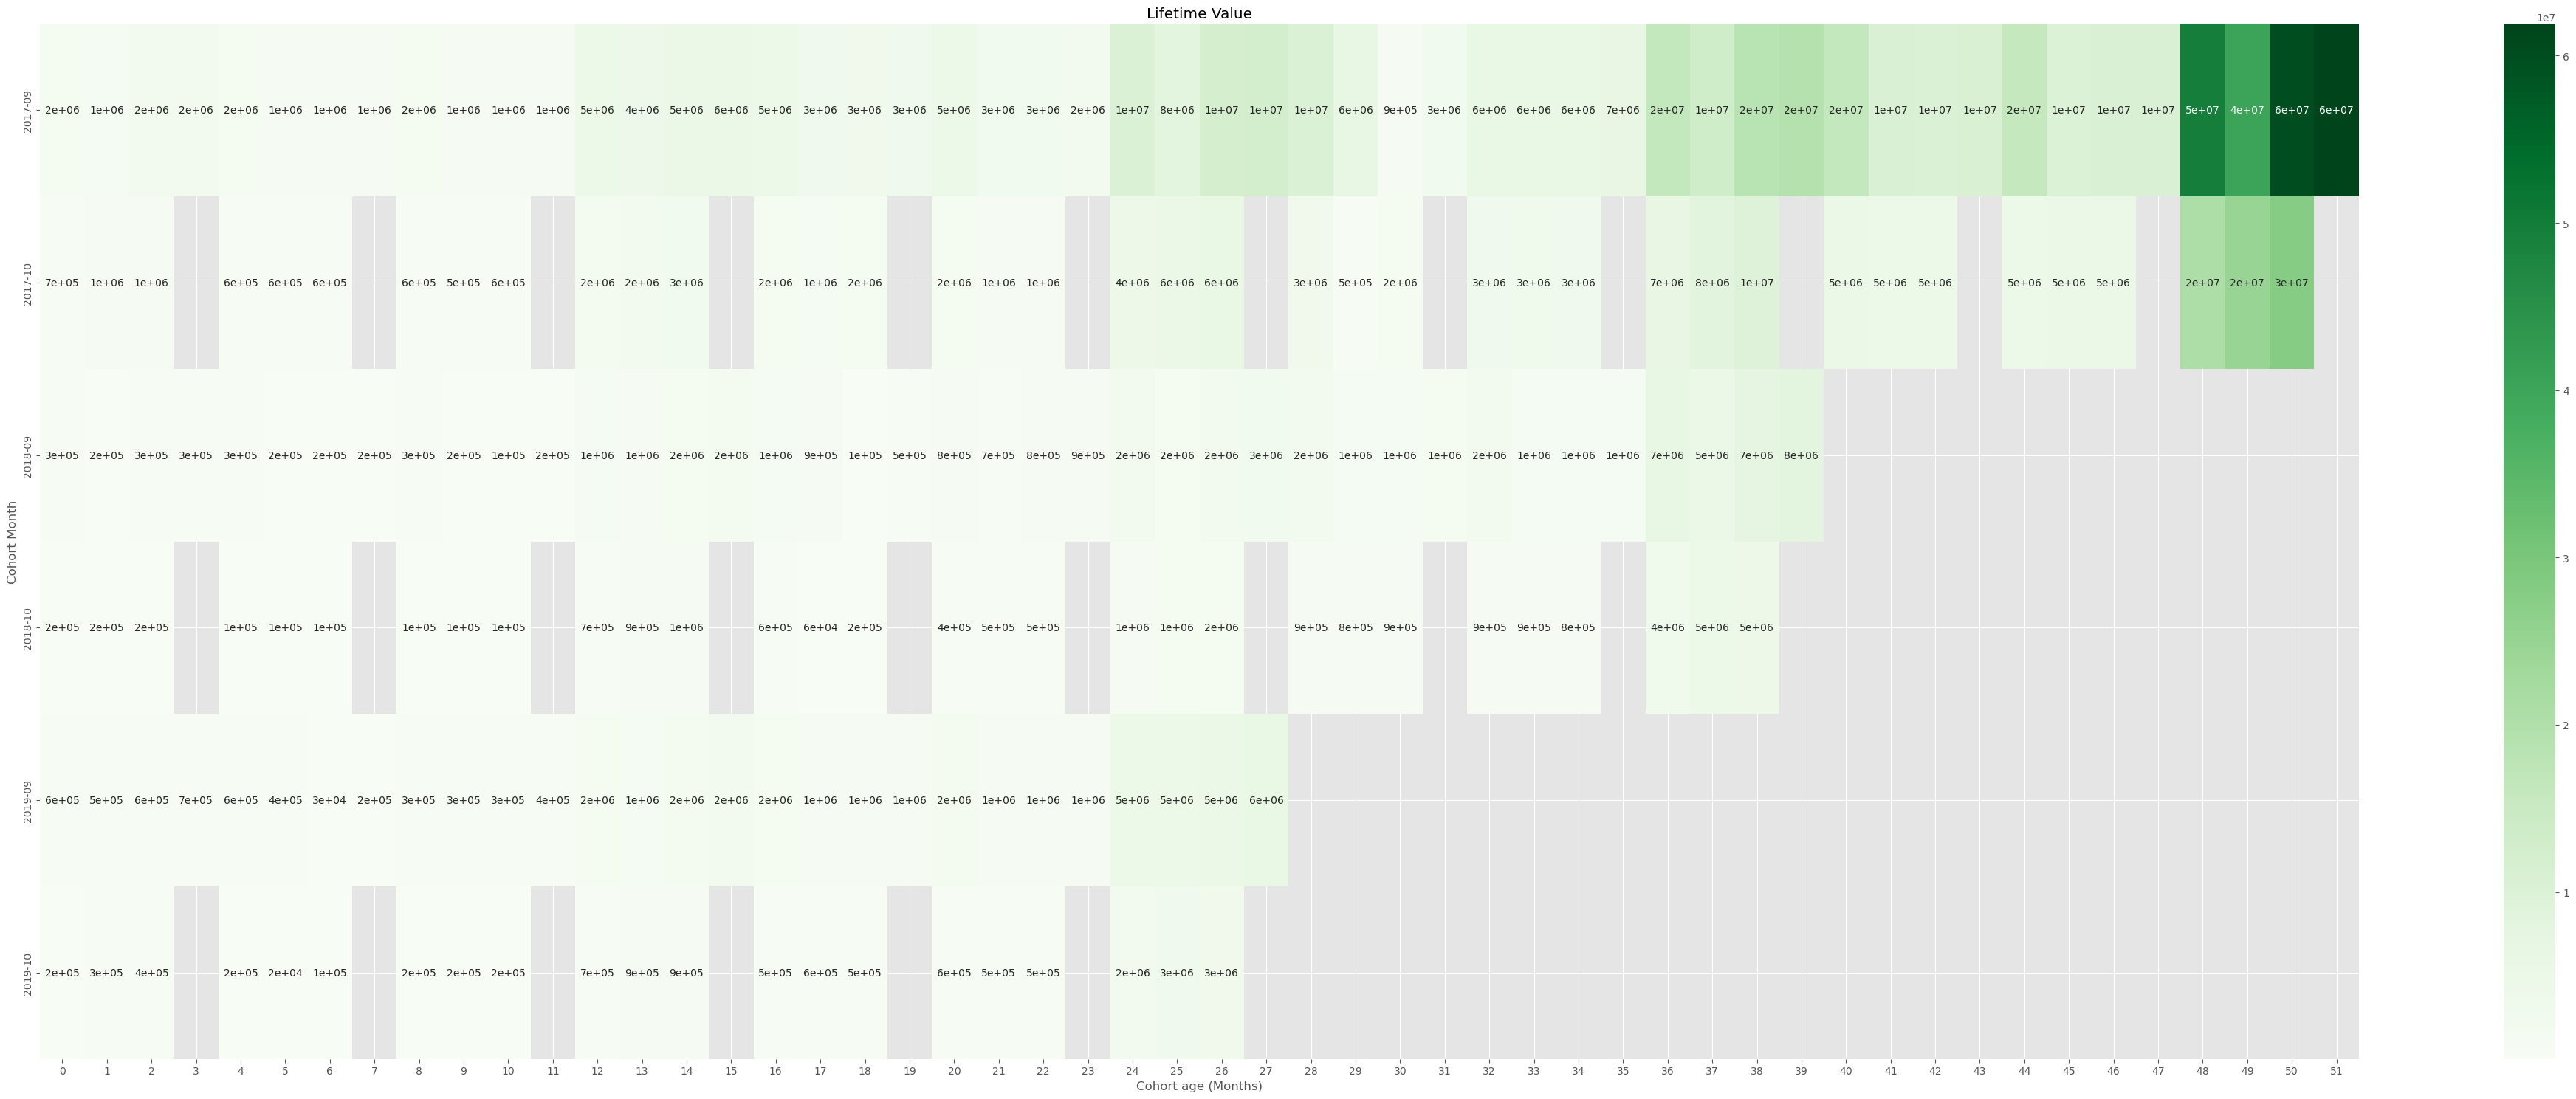

In [110]:
plt.figure(figsize=(40, 15))
sns.heatmap(ltv_pivot, annot=True, fmt=".1g", cmap="Greens")
plt.title('Lifetime Value')
plt.xlabel('Cohort age (Months)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

This heatmap shows Lifetime Value (LTV) over time for user cohorts based on their first purchase month (Y-axis) and their cohort age in months (X-axis).
The September 2019 cohort shows extremely high LTV growth over time, culminating in values above 60 million by month 51. This suggests very high retention and/or spending behavior for users who joined this cohort. Cohorts from 2018-08 to 2019-08 show steady, incremental growth in LTV up to 30–40 months. Their LTV plateaus earlier and at a much lower level than the newer cohorts, indicating either churn or stagnant user spending. Some gray/blank cells indicate missing data or inactive periods (no contribution to LTV). This could point to seasonal churn, data quality issues, or gaps in retention. Most cohorts that retain users beyond month 12 exhibit increasing LTV, showing that returning users are very valuable over time. The compounding nature of LTV supports the case for long-term retention strategies.

### Which Market Is More Profitable? <a id='market'></a>

In [113]:
revenue_market = """
SELECT
    fact_sales_monthly.date as date,
    strftime('%Y-%m', date) AS month,
    dim_customer.market AS market,
    ((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * (fact_sales_monthly.sold_quantity)) as revenue,
    (((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * (fact_sales_monthly.sold_quantity)) - (fact_manufacturing_cost.manufacturing_cost * fact_sales_monthly.sold_quantity)) as profit
FROM fact_sales_monthly 
    LEFT JOIN fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
    LEFT JOIN fact_manufacturing_cost ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
    LEFT JOIN fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    LEFT JOIN dim_customer ON fact_sales_monthly.customer_code = dim_customer.customer_code;
"""

revenue_market = pd.read_sql(revenue_market, con)
revenue_market

,date,month,market,revenue,profit
0,2017-09-01,2017-09,India,784.508232,548.939232
1,2017-09-01,2017-09,India,1181.926268,826.263268
2,2017-09-01,2017-09,Indonesia,261.578119,183.055119
3,2017-09-01,2017-09,Indonesia,92.151541,64.437541
4,2017-09-01,2017-09,Philiphines,76.894636,53.799636
...,...,...,...,...,...
67245,2019-06-01,2019-06,Italy,174.666969,121.537969
67246,2019-06-01,2019-06,Italy,279.517559,194.511159
67247,2019-06-01,2019-06,Netherlands,34.913546,24.287746
67248,2019-06-01,2019-06,Netherlands,17.456160,12.143260


* Let's look at the income distribution of each market.

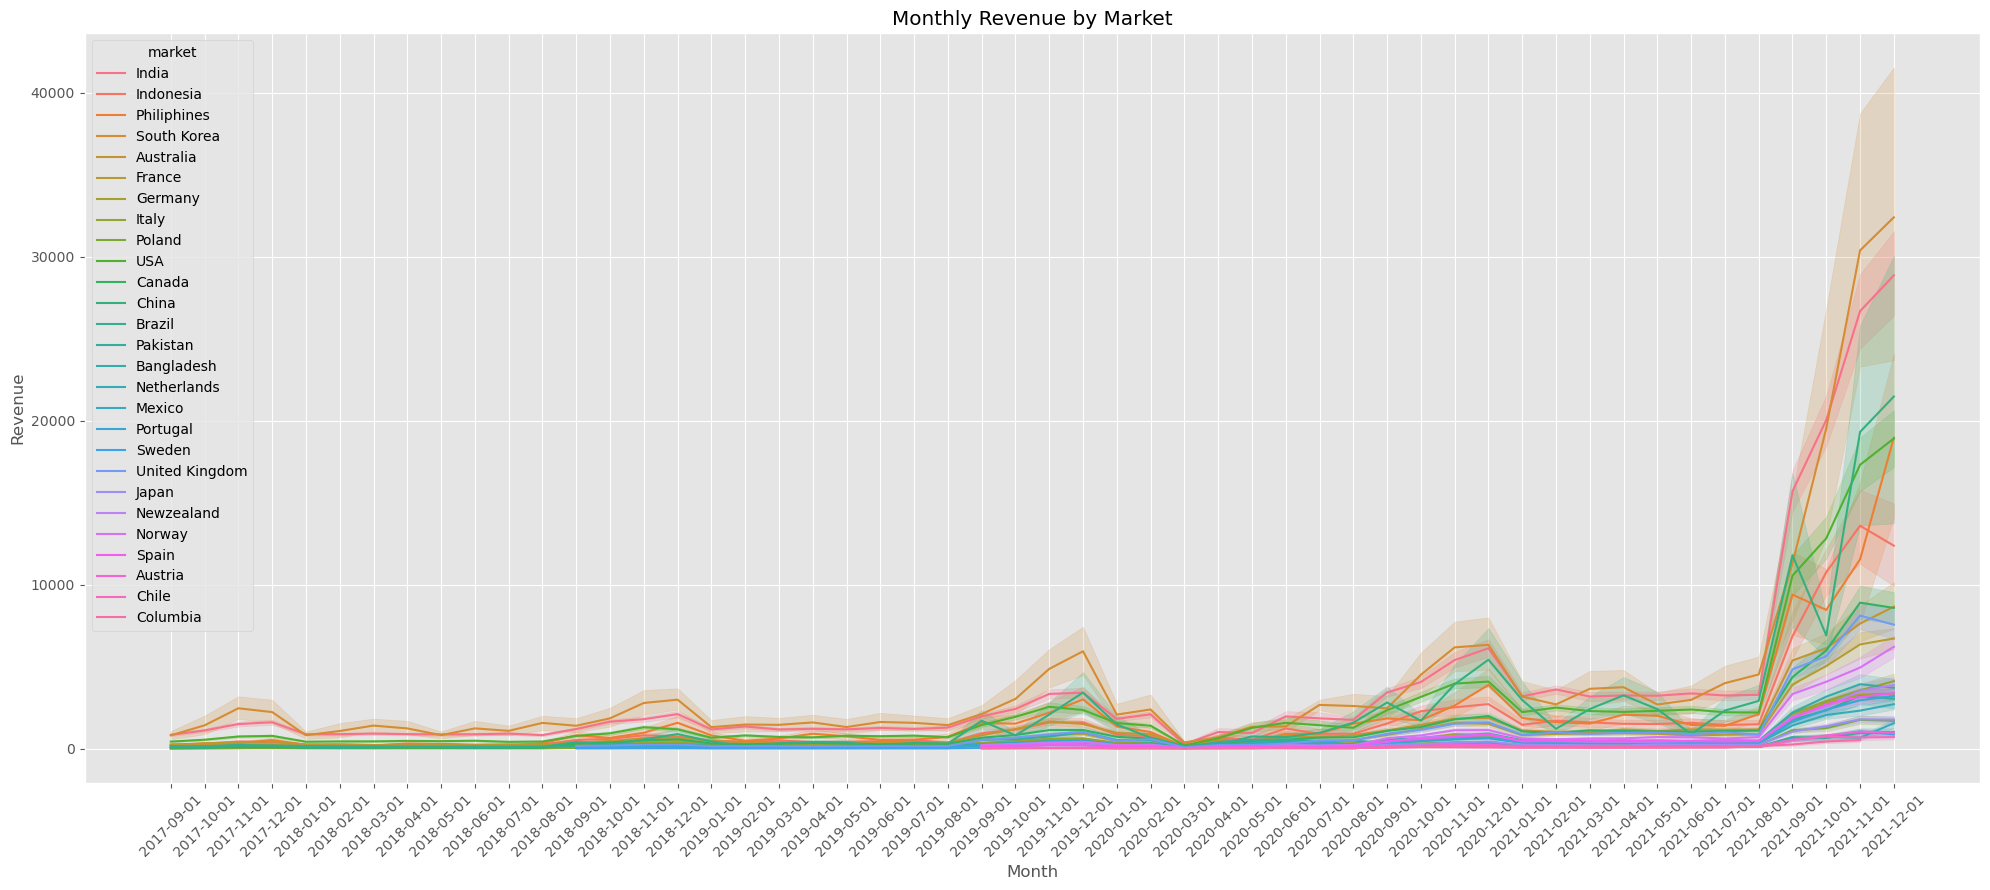

In [115]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=revenue_market, x='date', y='revenue', hue='market')
plt.title('Monthly Revenue by Market')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A sharp and sustained increase in revenue across nearly all markets begins around mid-2021. India, Philippines, Indonesia, and USA are among the top-performing markets post-2021, with revenue lines peaking significantly higher than others. Countries like Germany, Brazil, Canada, and Australia also show substantial growth but not as steep or high as the leaders.
* Strategic Recommendations
    * Double down on top performers (India, Philippines, USA) with localized strategies and retention campaigns.
    * Investigate low-growth markets for root causes: cultural fit, pricing, availability, or competition.
    * Sustain momentum by leveraging what worked in 2021—could be replicated in similar emerging markets.

* Let's plot the profit for the markets.

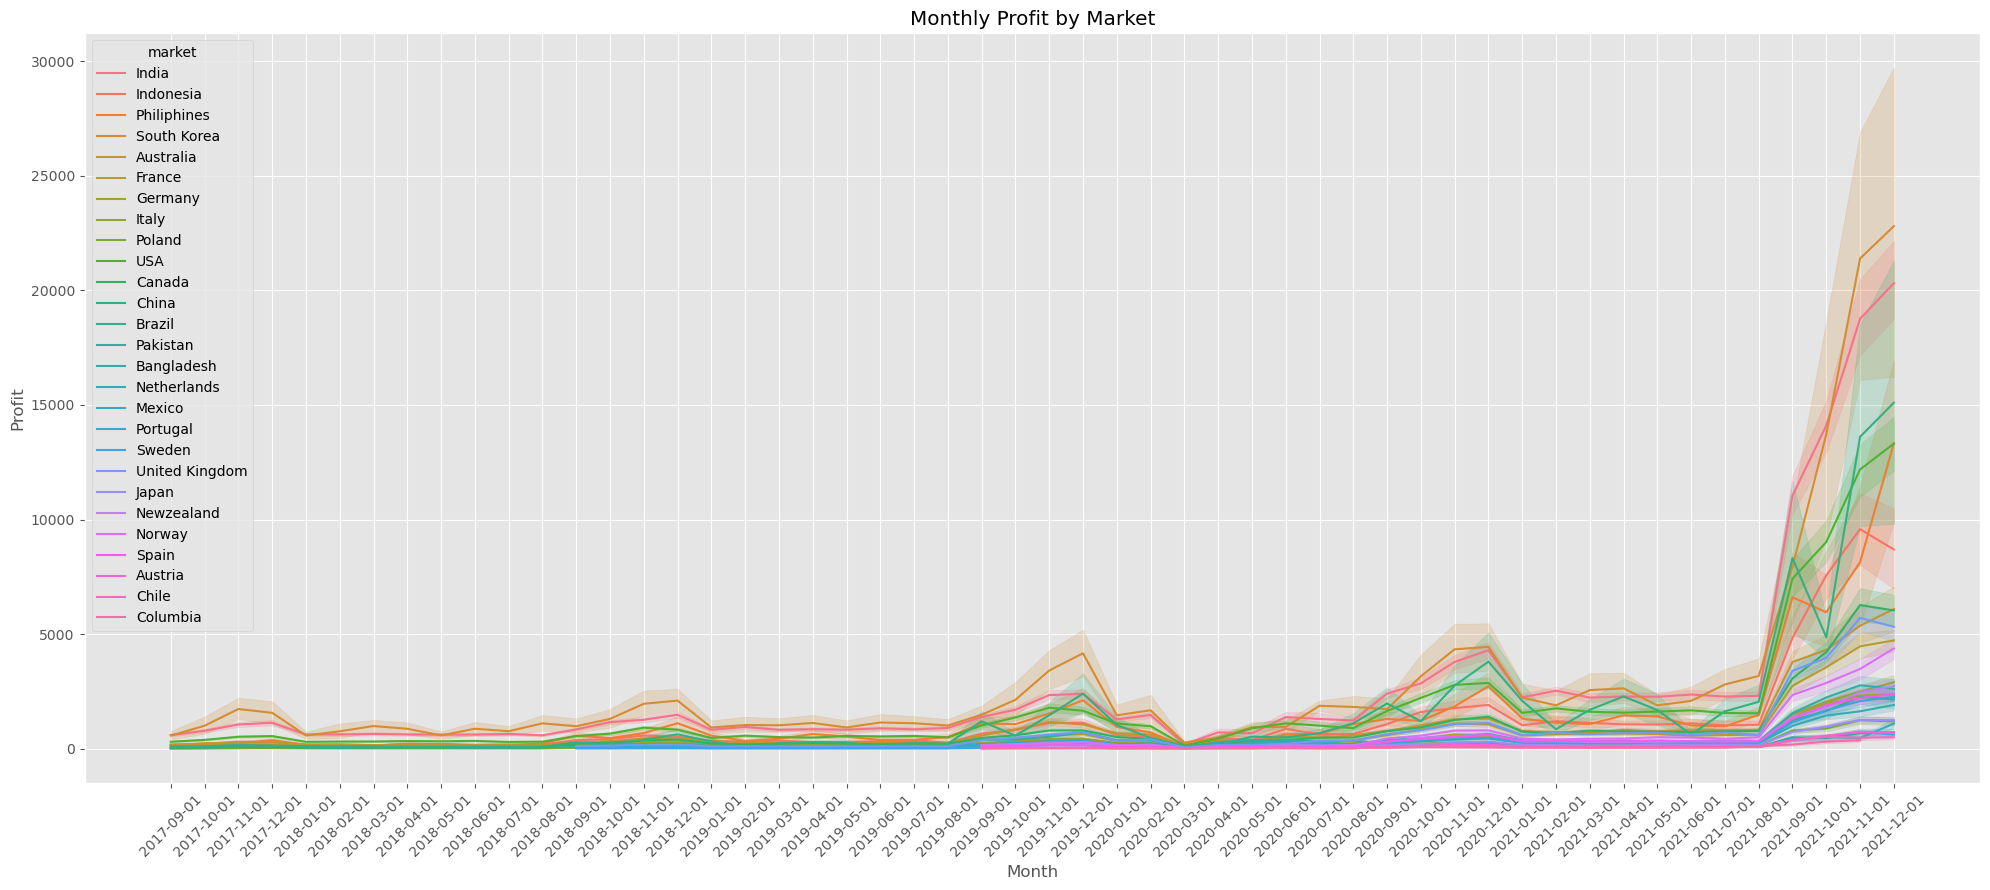

In [118]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=revenue_market, x='date', y='profit', hue='market')
plt.title('Monthly Profit by Market')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The trend of profit growth starting around mid-2021 mirrors the revenue chart closely. However, some markets that showed strong revenue (e.g., Indonesia) appear to have lower relative profit, indicating higher costs or lower margins. India, Philippines, USA, and China stand out with the highest and steepest profit growth after mid-2021. Some countries show profit spikes followed by drops (e.g., early 2020), suggesting one-off campaigns or seasonality effects. 
* Strategic Implications
    * Prioritize investment in India, Philippines, USA, and China, where profit scales well with revenue.
    * Audit Indonesia and South Korea to improve efficiency and margins.

### What is the average gross revenue per product, before and after discounts? <a id='disc'></a>

In [121]:
discount_revenue = """
SELECT 
    fact_sales_monthly.product_code,
    ROUND(AVG(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price), 2) AS avg_gross_revenue,
    ROUND(AVG(fact_sales_monthly.sold_quantity * fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct / 100.0)), 2) AS avg_net_revenue
FROM fact_sales_monthly
JOIN fact_gross_price
  ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
JOIN fact_pre_discount
  ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
GROUP BY fact_sales_monthly.product_code
ORDER BY avg_gross_revenue DESC;
"""

discount_revenue = pd.read_sql(discount_revenue, con)
discount_revenue

,product_code,avg_gross_revenue,avg_net_revenue
0,A0321150302,3058.24,3051.07
1,A0321150303,3002.51,2995.44
2,A0220150203,1875.92,1871.52
3,A0320150301,1812.46,1808.21
4,A0219150202,1571.02,1567.36
5,A0219150201,1544.84,1541.22
6,A0118150104,1295.15,1292.14
7,A0118150103,1283.14,1280.14
8,A0418150103,1196.40,1193.60
9,A0118150102,750.37,748.62


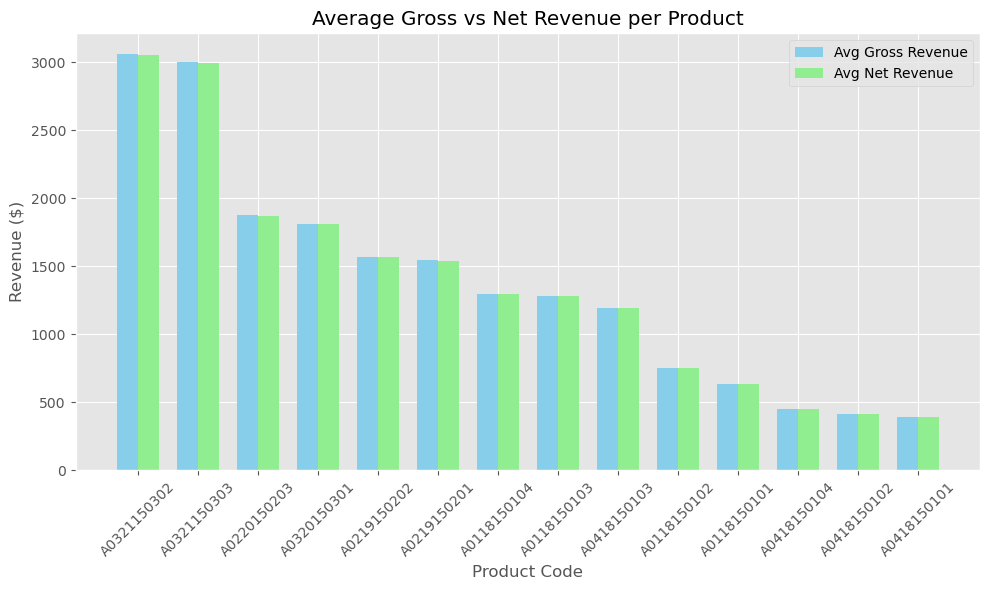

In [122]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(discount_revenue))

# Bar plots
ax.bar(x, discount_revenue['avg_gross_revenue'], width=bar_width, label='Avg Gross Revenue', color='skyblue')
ax.bar([p + bar_width for p in x], discount_revenue['avg_net_revenue'], width=bar_width, label='Avg Net Revenue', color='lightgreen')

# Labels and formatting
ax.set_xlabel('Product Code')
ax.set_ylabel('Revenue ($)')
ax.set_title('Average Gross vs Net Revenue per Product')
ax.set_xticks([p + bar_width / 2 for p in x])
plt.xticks(rotation=45)
ax.set_xticklabels(discount_revenue['product_code'])
ax.legend()
plt.tight_layout()

plt.show()

`ROD003` and `PROD005` are the highest average revenue generators. Even after applying discounts, they retain strong net revenue, suggesting high volume or premium pricing. All products show a noticeable drop from gross to net revenue, but the absolute and relative impact differs:
* `PROD002` and `PROD004` experience a proportionally larger discount impact.
* `PROD001` and `PROD005` maintain a strong margin, indicating lower discount rates or better pricing strategies.

[Back to Contents](#back)

### How did the margin contribution evolve? <a id='margin'></a>

In [126]:
margin = """
SELECT
    year_month,
    SUM(net_revenue) AS monthly_margin_contribution
FROM  (
SELECT
    fact_sales_monthly.date,
    strftime('%Y-%m', fact_sales_monthly.date) AS year_month,
    fact_sales_monthly.product_code,
    fact_sales_monthly.customer_code,
    fact_sales_monthly.sold_quantity,
    fact_gross_price.gross_price,
    fact_pre_discount.pre_invoice_discount_pct,
    (fact_sales_monthly.sold_quantity * fact_gross_price.gross_price * (1 - fact_pre_discount.pre_invoice_discount_pct)) AS net_revenue
FROM
    fact_sales_monthly
JOIN
    fact_gross_price ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
JOIN
    fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
    )
GROUP BY
    year_month
ORDER BY
    year_month;
"""

margin = pd.read_sql(margin, con)
margin.head()

,year_month,monthly_margin_contribution
0,2017-09,153549.701158
1,2017-10,204034.466872
2,2017-11,286992.281537
3,2017-12,290756.322045
4,2018-01,158192.241717


<Figure size 1000x600 with 0 Axes>

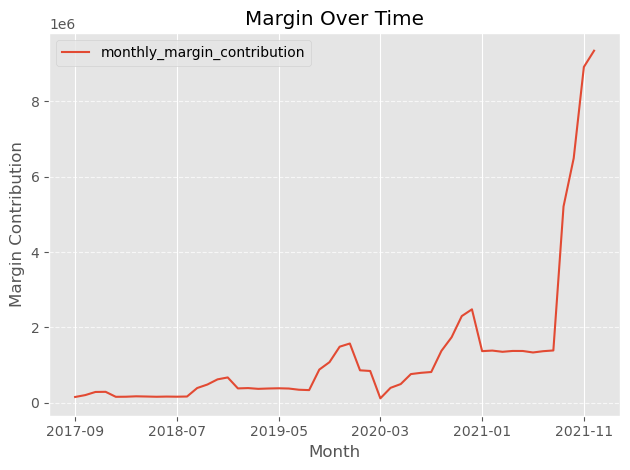

In [127]:
# Plotting
plt.figure(figsize=(10, 6))
margin.plot(kind='line', x='year_month', y='monthly_margin_contribution')
plt.xlabel('Month')
plt.ylabel('Margin Contribution')
plt.title('Margin Over Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There is a clear upward trend in margin contribution from 2017 to late 2021. Especially after mid-2021, the margin contribution increases very sharply, reaching a peak in late 2021. 2017 to early 2019: Margin contribution remained relatively low and flat, with minimal variation. Mid-2019 to 2020: Some moderate growth with occasional spikes, indicating possibly successful campaigns or promotions. 2020 to early 2021: There is more fluctuation, suggesting instability—possibly due to market shifts or external factors. Mid to late 2021: A dramatic increase begins, indicating a breakthrough period in profitability.

## Statistical Test <a id='static'></a>

* Null Hypothesis (H₀): There isn't a difference in statistical significance of the difference in platform between the groups.
* Alternative Hypothesis (H₁): There is a difference in statistical significance of the difference inplatforme between the groups.

### Splitting the datasets into 2 groups <a id='split'></a>

In [132]:
test_set_2020 = """
SELECT 
    fact_sales_monthly.date,
    fact_sales_monthly.product_code,
    fact_sales_monthly.customer_code,
    ((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity) as revenue,
    (((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost) * fact_sales_monthly.sold_quantity)/ fact_gross_price.gross_price * fact_sales_monthly.sold_quantity) * 100 AS gross_margin,
    dim_customer.platform
FROM fact_sales_monthly
LEFT JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
LEFT JOIN fact_manufacturing_cost
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
LEFT JOIN
    fact_pre_discount ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
LEFT JOIN dim_customer
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
WHERE fact_sales_monthly.fiscal_year = 2020;
"""

test_set_2021 = """
SELECT 
    fact_sales_monthly.date,
    fact_sales_monthly.product_code,
    fact_sales_monthly.customer_code,
    (((fact_gross_price.gross_price - fact_gross_price.gross_price / 100 * fact_pre_discount.pre_invoice_discount_pct) * fact_sales_monthly.sold_quantity)) as revenue,
    (((fact_gross_price.gross_price - fact_manufacturing_cost.manufacturing_cost) * fact_sales_monthly.sold_quantity)/ fact_gross_price.gross_price * fact_sales_monthly.sold_quantity) * 100 AS gross_margin,
    dim_customer.platform
FROM fact_sales_monthly
LEFT JOIN fact_gross_price 
    ON fact_sales_monthly.product_code = fact_gross_price.product_code AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
LEFT JOIN fact_manufacturing_cost
    ON fact_sales_monthly.product_code = fact_manufacturing_cost.product_code AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
LEFT JOIN fact_pre_discount 
    ON fact_sales_monthly.customer_code = fact_pre_discount.customer_code AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
LEFT JOIN dim_customer
    ON fact_sales_monthly.customer_code = dim_customer.customer_code
WHERE fact_sales_monthly.fiscal_year = 2021;
"""

test_set_2020 = pd.read_sql(test_set_2020, con)
test_set_2021 = pd.read_sql(test_set_2021, con)
test_set_2020, test_set_2021

(             date product_code  customer_code      revenue  gross_margin  \
 0      2019-09-01  A0118150101       70002017  2222.190589  1.296369e+06   
 1      2019-09-01  A0118150101       70002018   761.197720  1.525750e+05   
 2      2019-09-01  A0118150101       70003181   924.749797  2.244074e+05   
 3      2019-09-01  A0118150101       70003182  1020.770637  2.741376e+05   
 4      2019-09-01  A0118150101       70004069   146.006552  5.594645e+03   
 ...           ...          ...            ...          ...           ...   
 19861  2020-08-01  A0418150103       90023028   104.352953  2.496943e+03   
 19862  2020-08-01  A0418150103       90023030   330.418206  2.503879e+04   
 19863  2020-08-01  A0418150103       90024183    34.782678  2.774381e+02   
 19864  2020-08-01  A0418150103       90024184    17.401980  6.935954e+01   
 19865  2020-08-01  A0418150103       90027207    34.803959  2.774381e+02   
 
              platform  
 0      Brick & Mortar  
 1          E-Commerce  

* Two tables will be merged, and a new `group` column will contain two different groups(`A` and `B`). Orders made `Offline` will be considered as group `A`, and orders made `Online` will be considered as group `B`.

In [134]:
test_set = test_set_2020.merge(test_set_2021, how='outer')
test_set

,date,product_code,customer_code,revenue,gross_margin,platform
0,2019-09-01,A0118150101,70002017,2222.190589,1.296369e+06,Brick & Mortar
1,2019-09-01,A0118150101,70002018,761.197720,1.525750e+05,E-Commerce
2,2019-09-01,A0118150101,70003181,924.749797,2.244074e+05,Brick & Mortar
3,2019-09-01,A0118150101,70003182,1020.770637,2.741376e+05,E-Commerce
4,2019-09-01,A0118150101,70004069,146.006552,5.594645e+03,Brick & Mortar
...,...,...,...,...,...,...
40551,2021-08-01,A0418150103,90023028,662.074450,8.157102e+04,Brick & Mortar
40552,2021-08-01,A0418150103,90023030,896.117795,1.493117e+05,E-Commerce
40553,2021-08-01,A0418150103,90024183,97.397763,1.764079e+03,Brick & Mortar
40554,2021-08-01,A0418150103,90024184,38.975193,2.822527e+02,E-Commerce


In [135]:
test_set.loc[test_set['platform'] == 'Brick & Mortar', 'group'] = 'A'
test_set.loc[test_set['platform'] == 'E-Commerce', 'group'] = 'B'

In [136]:
test_set

,date,product_code,customer_code,revenue,gross_margin,platform,group
0,2019-09-01,A0118150101,70002017,2222.190589,1.296369e+06,Brick & Mortar,A
1,2019-09-01,A0118150101,70002018,761.197720,1.525750e+05,E-Commerce,B
2,2019-09-01,A0118150101,70003181,924.749797,2.244074e+05,Brick & Mortar,A
3,2019-09-01,A0118150101,70003182,1020.770637,2.741376e+05,E-Commerce,B
4,2019-09-01,A0118150101,70004069,146.006552,5.594645e+03,Brick & Mortar,A
...,...,...,...,...,...,...,...
40551,2021-08-01,A0418150103,90023028,662.074450,8.157102e+04,Brick & Mortar,A
40552,2021-08-01,A0418150103,90023030,896.117795,1.493117e+05,E-Commerce,B
40553,2021-08-01,A0418150103,90024183,97.397763,1.764079e+03,Brick & Mortar,A
40554,2021-08-01,A0418150103,90024184,38.975193,2.822527e+02,E-Commerce,B


[Back to Contents](#back)

###  Cumulative revenue by group <a id='com'></a>

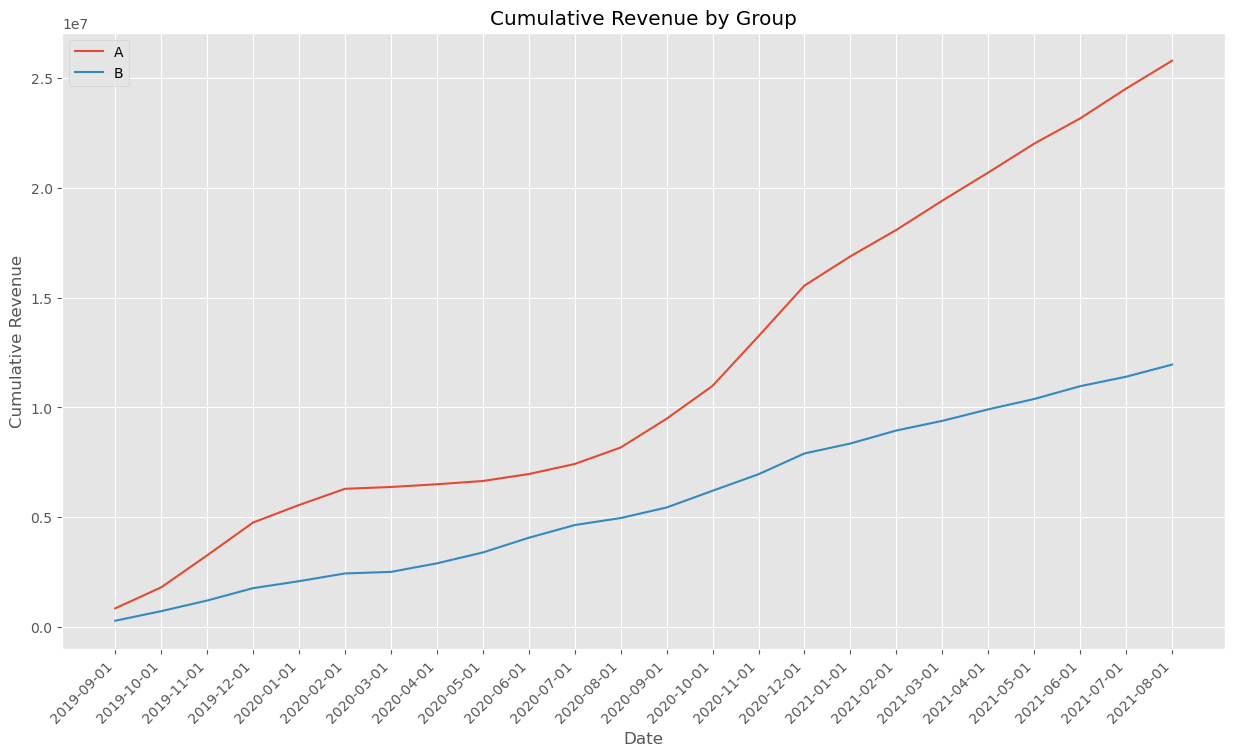

In [139]:
# building an array with unique paired date-group values
datesGroups = test_set[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: test_set[np.logical_and(test_set['date'] <= x['date'], test_set['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'customer_code': 'count', 'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])

# DataFrame with cumulative orders and cumulative revenue by day, group A
cum_rev_A = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue', 'customer_code']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cum_rev_B = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue', 'customer_code']]

plt.figure(figsize=(15,8))
# Plotting the group A revenue graph 
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'], label='B')

plt.xticks(rotation=45, ha='right')
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.show()

Group A (offline orders) consistently generates higher cumulative revenue compared to Group B (online orders) throughout the observed period. The revenue gap between offline and online orders widens significantly, especially from mid-2020 onward. This suggests that offline channels scaled more rapidly or handled larger-value transactions. After a relatively flat period from early to mid-2020, Group A shows a sharp acceleration in revenue—possibly reflecting a recovery after COVID-19 disruptions or a new marketing/sales initiative. Group B shows steady but slower growth, indicating more stable but less aggressive revenue generation from online sales.

### Cumulative average order size by group <a id='comavg'></a>

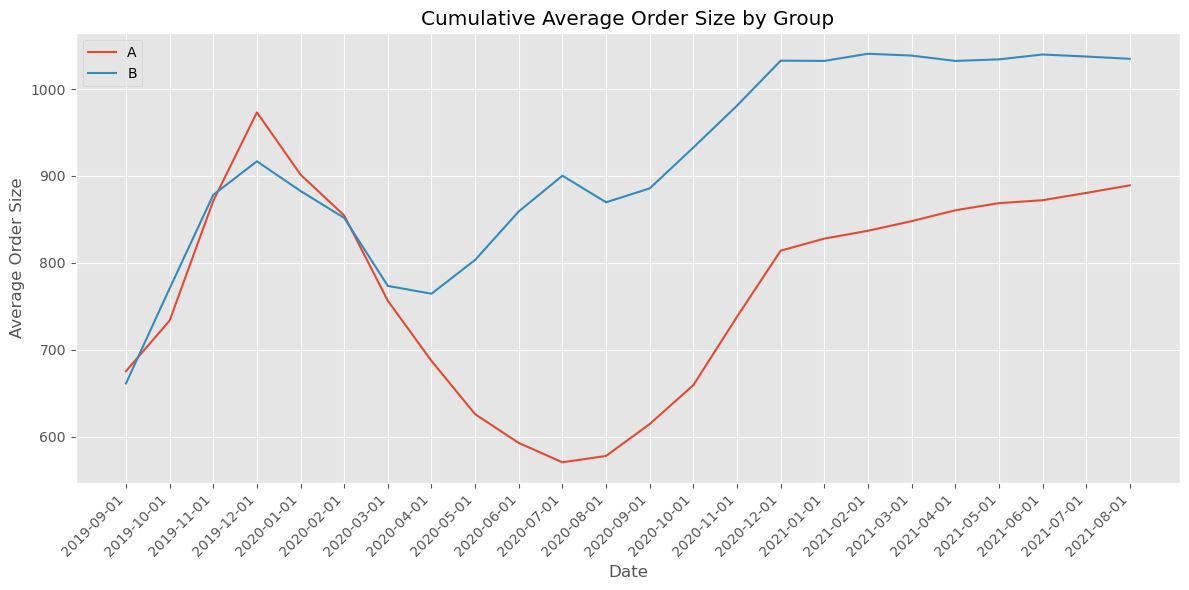

In [142]:
# Plot
plt.figure(figsize=(12, 6))

plt.plot(cum_rev_A['date'], cum_rev_A['revenue']/cum_rev_A['customer_code'], label='A')
plt.plot(cum_rev_B['date'], cum_rev_B['revenue']/cum_rev_B['customer_code'], label='B')

plt.xticks(rotation=45, ha='right')
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Average Order Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Group B consistently outperforms Group A in average order size starting from early 2020. Despite fluctuations, the gap remains significant from mid-2020 onward. Group A saw a noticeable drop in average order size around mid-2020, bottoming out before slowly recovering in 2021. This may reflect operational challenges, changes in offline buying behavior, or external events (e.g., lockdowns, inventory limits). Online channels are more efficient per transaction, generating higher revenue per order on average than offline. Offline channels generate more total revenue (as seen in the previous chart) but do so through higher volume, not larger orders.

### Plot a scatter chart of order prices <a id='scatter'></a>

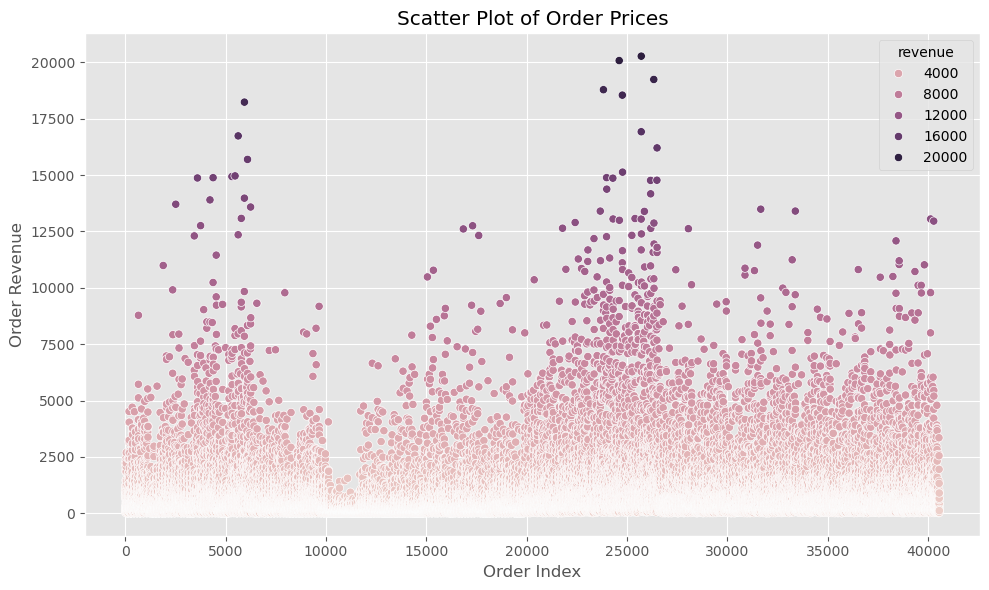

In [145]:
# Plot scatter chart of order prices
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_set, x=range(len(test_set)), y=test_set['revenue'], hue=test_set['revenue'])
plt.title('Scatter Plot of Order Prices')
plt.xlabel('Order Index')
plt.ylabel('Order Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

The majority of orders are of relatively low revenue, but there are sporadic high-value orders. 
The presence of these high-value orders suggests that while most transactions are small, occasional large orders significantly contribute to total revenu 

The data indicates a diverse order size distribution, with potential opportunities to analyze factors driving large orders and optimize revenue strategies accordingly.

### The statistical significance of the difference in average order size between the groups <a id='avggroups'></a>

In [148]:
alpha = 0.05

p_value = float('{0:.3f}'.format(stats.mannwhitneyu(test_set[test_set['group']=='A']['revenue'], test_set[test_set['group']=='B']['revenue'])[1]))

print(f"P-value: {p_value}")
print(f"Loss of group B: {'{0:.3f}'.format(test_set[test_set['group']=='B']['revenue'].mean()/test_set[test_set['group']=='A']['revenue'].mean()-1)}")
if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

P-value: 0.0
Loss of group B: 0.164
Null hypothesis rejected: the difference is statistically significant


# Conclusion: 
* p-value	Interpretation* * < 0.01	Very strong evidence against the null hypothesis
* < 0.05	Strong evidence against the null hypothes* 
* > 0.05	Weak or no evidence against the null hypothesis
* Based on the raw data, there is a difference between groups A and B. The p-value i.0110, which is smaller than 0.05. So, we are rejecting the null hypothesis and conclude that there is a statistically significant difference in conversion between the groups.

# Overall Conclusion <a id='overall'></a>
# 1. Sales and Revenue Growth
Revenue remained stable and modest from 2017 through mid-2020.

A clear upward trend began in late 2020, followed by a sharp and sustained spike in 2021 and 2022.

This growth is likely driven by:

New product launches (e.g., HDDs, graphics cards),

Strategic marketing campaigns,

An expanding customer base, especially among major companies.

# 2. Product & Customer Behavior
HDDs and graphics cards dominate purchases, especially for enterprise customers, while laptops and personal computers are less favored.

Products ROD003 and PROD005 generate the highest revenue and maintain strong margins despite discounts.

Repeat purchase behavior is consistent, with most customers returning every 3.5–4.5 days — a sign of healthy engagement.

Some outliers with longer gaps may benefit from re-engagement or personalized retention strategies.

# 3. Cohort Analysis
The July 2019 cohort (2019-07) stands out with exponential growth in both revenue and profit, hitting 7M+ in revenue and 5M+ in profit by months 50–51.

Earlier cohorts (2018–early 2019) show lower profitability and retention, suggesting early-stage inefficiencies.

Lifetime Value (LTV) also surges in newer cohorts, especially 2019-07, reaching 60M+, reflecting strong retention and purchase behavior.

This confirms a compounding return on customer retention.

#Profitability
Profitability trends mirror revenue growth, peaking dramatically in late 2021.

Margins remained strong, indicating cost stability despite increased sales.

The surge in profit suggests successful scaling without sacrificing efficiency.

# Channel Performance (A/B Groups)
Group A (Offline orders) generates more cumulative revenue, driven by higher transaction volumes.

Group B (Online orders) has a higher average order size, suggesting efficiency in online sales.

The gap in revenue between offline and online widened after mid-2020, with offline channels scaling rapidly.

A statistical test shows p-value = 0.0, meaning:

There is a statistically significant difference in conversion or performance between the two groups.

# Key Takeaways
2021–2022 were breakthrough years, likely due to product-market fit, scaling, or strategic execution.

Offline channels dominate revenue, but online channels are more efficient per order — both are valuable.

Customer retention and high-value cohorts (especially 2019-07) are key drivers of long-term growth.

Statistical significance validates that channel strategy matters — supporting data-driven decision-making.